In [8]:
#importando o arquivo
import os
os.chdir('C:\\Users\\Usuario\\Desktop\\dna')
data1= open('splice.data.txt', 'r')

#passando o arquivo para um list, com as classes convertidas para int, converte as series para int
f= data1.readlines()
for i in range(len(f)):
    f[i]= f[i].split(',')
for i in range(len(f)):
    del(f[i][1])
for i in range(len(f)):
    f[i][1]=f[i][1].split()[0]
c=[]
for i in range(len(f)):
    b=[]
    if f[i][0]=='EI':
        b.append(0)
    elif f[i][0]=='IE':
        b.append(1)
    elif f[i][0]=='N':
        b.append(2)
    a=[]
    for j in range(len(f[i][1])):
        if f[i][1][j]=='A':
            a.append(0)
        elif f[i][1][j]=='C':
            a.append(1)
        elif f[i][1][j]=='G':
            a.append(2)
        elif f[i][1][j]=='T':
            a.append(3)
        else:
            a.append(8)
    b.append(a)
    c.append(b)
cdata=[]
ctarg=[]

for i in range(len(c)):
    cdata.append(c[i][1])
    ctarg.append((c[i][0]))
    

#agora para comparar as series e encontrar subsequencias, construir uma DISTANCE PROFILE, usando a distancia da seguinte
#maneira: se a1 != de b1 Distancia == Distancia +1
import numpy as np
def Distanceprofile(data, WindowStart, WindowEnd, WindowGrowth, SeriesSize):
    ConcateData= []
    for i in range(len(data)):
        ConcateData = np.concatenate([ConcateData, data[i]])
    DistanceProfiles=[]
    for Window in range(WindowStart, WindowEnd, WindowGrowth):
        j=0
        DistanceProfile=[]
        while (j<len(ConcateData)):
            Subsequence = []
            for sub in range(Window):
                Subsequence.append(ConcateData[j+sub])
            for Changeinthesubslocation in range(Window):
                ConcateData[j + Changeinthesubslocation] = 8
            LookingForMinimum= []
            i=0
            while(i<len(ConcateData)):
                SequencePiece = ConcateData[i:i+Window]
                Distance=0
                for k in range(Window):
                    if(Subsequence[k] != SequencePiece[k]):
                        Distance= Distance+1
                LookingForMinimum.append(Distance)
                if((i+Window)%SeriesSize == 0):
                    i= i+Window
                    for NotRelevantPiece in range(Window):
                        LookingForMinimum.append(Window)
                else:
                    i= i+1
                
            DistanceProfile.append(np.amin(LookingForMinimum))
            for Changeinthesubslocation in range(Window):
                ConcateData[j + Changeinthesubslocation] = Subsequence[Changeinthesubslocation]
            if((j+Window)%SeriesSize == 0):
                j= j+Window
            else:
                j= j+1
            
        DistanceProfiles.append(DistanceProfile)
    return DistanceProfiles
                
    
    


'    \n#agora para comparar as series e encontrar subsequencias, construir uma DISTANCE PROFILE, usando a distancia da seguinte\n#maneira: se a1 != de b1 Distancia == Distancia +1\nimport numpy as np\ndef Distanceprofile(data, WindowStart, WindowEnd, WindowGrowth, SeriesSize):\n    ConcateData= []\n    for i in range(len(data)):\n        ConcateData = np.concatenate([ConcateData, data[i]])\n    DistanceProfiles=[]\n    for Window in range(WindowStart, WindowEnd, WindowGrowth):\n        j=0\n        DistanceProfile=[]\n        while (j<len(ConcateData)):\n            Subsequence = []\n            for sub in range(Window):\n                Subsequence.append(ConcateData[j+sub])\n            for Changeinthesubslocation in range(Window):\n                ConcateData[j + Changeinthesubslocation] = 8\n            LookingForMinimum= []\n            i=0\n            while(i<len(ConcateData)):\n                SequencePiece = ConcateData[i:i+Window]\n                Distance=0\n                

In [99]:
DP = Distanceprofile(cdata[0:], 20, 30, 10, 60)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386

2613
2614
2615
2616
2617
2618
2619
2620
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907


5012
5013
5014
5015
5016
5017
5018
5019
5020
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306


7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705


9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093

11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
1208

13837
13838
13839
13840
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
1407

15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
1609

17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
17890
17891
17892
17893
17894
17895
17896
17897
17898
17899
17900
17901
17902
17903
17904
17905
17906
17907
17908
17909
17910
17911
17912
17913
17914
17915
17916
17917
17918
17919
17920
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
1808

19835
19836
19837
19838
19839
19840
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
2007

21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21878
21879
21880
21900
21901
21902
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22020
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22038
22039
22040
22041
22042
22043
22044
22045
22046
22047
22048
22049
22050
22051
22052
22053
22054
22055
22056
22057
22058
22059
22060
22080
22081
22082
22083
22084
22085
22086
22087
22088
2208

23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
2408

25833
25834
25835
25836
25837
25838
25839
25840
25860
25861
25862
25863
25864
25865
25866
25867
25868
25869
25870
25871
25872
25873
25874
25875
25876
25877
25878
25879
25880
25881
25882
25883
25884
25885
25886
25887
25888
25889
25890
25891
25892
25893
25894
25895
25896
25897
25898
25899
25900
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
25935
25936
25937
25938
25939
25940
25941
25942
25943
25944
25945
25946
25947
25948
25949
25950
25951
25952
25953
25954
25955
25956
25957
25958
25959
25960
25980
25981
25982
25983
25984
25985
25986
25987
25988
25989
25990
25991
25992
25993
25994
25995
25996
25997
25998
25999
26000
26001
26002
26003
26004
26005
26006
26007
26008
26009
26010
26011
26012
26013
26014
26015
26016
26017
26018
26019
26020
26040
26041
26042
26043
26044
26045
26046
26047
26048
26049
26050
26051
26052
26053
26054
26055
26056
26057
26058
26059
26060
26061
26062
26063
26064
26065
26066
26067
26068
26069
26070
26071
26072
26073
26074
2607

27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28080
28081
28082
28083
28084
28085
28086
2808

29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
29903
29904
29905
29906
29907
29908
29909
29910
29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
30000
30001
30002
30003
30004
30005
30006
30007
30008
30009
30010
30011
30012
30013
30014
30015
30016
30017
30018
30019
30020
30021
30022
30023
30024
30025
30026
30027
30028
30029
30030
30031
30032
30033
30034
30035
30036
30037
30038
30039
30040
30060
30061
30062
30063
30064
30065
30066
30067
30068
30069
30070
30071
30072
30073
30074
30075
30076
30077
30078
30079
3008

31831
31832
31833
31834
31835
31836
31837
31838
31839
31840
31860
31861
31862
31863
31864
31865
31866
31867
31868
31869
31870
31871
31872
31873
31874
31875
31876
31877
31878
31879
31880
31881
31882
31883
31884
31885
31886
31887
31888
31889
31890
31891
31892
31893
31894
31895
31896
31897
31898
31899
31900
31920
31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
3207

33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
33854
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
34033
34034
34035
34036
34037
34038
34039
34040
34041
34042
34043
34044
34045
34046
34047
34048
34049
34050
34051
34052
34053
34054
34055
34056
34057
34058
34059
34060
34080
34081
34082
34083
34084
3408

35836
35837
35838
35839
35840
35841
35842
35843
35844
35845
35846
35847
35848
35849
35850
35851
35852
35853
35854
35855
35856
35857
35858
35859
35860
35880
35881
35882
35883
35884
35885
35886
35887
35888
35889
35890
35891
35892
35893
35894
35895
35896
35897
35898
35899
35900
35901
35902
35903
35904
35905
35906
35907
35908
35909
35910
35911
35912
35913
35914
35915
35916
35917
35918
35919
35920
35940
35941
35942
35943
35944
35945
35946
35947
35948
35949
35950
35951
35952
35953
35954
35955
35956
35957
35958
35959
35960
35961
35962
35963
35964
35965
35966
35967
35968
35969
35970
35971
35972
35973
35974
35975
35976
35977
35978
35979
35980
36000
36001
36002
36003
36004
36005
36006
36007
36008
36009
36010
36011
36012
36013
36014
36015
36016
36017
36018
36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
3607

37829
37830
37831
37832
37833
37834
37835
37836
37837
37838
37839
37840
37860
37861
37862
37863
37864
37865
37866
37867
37868
37869
37870
37871
37872
37873
37874
37875
37876
37877
37878
37879
37880
37881
37882
37883
37884
37885
37886
37887
37888
37889
37890
37891
37892
37893
37894
37895
37896
37897
37898
37899
37900
37920
37921
37922
37923
37924
37925
37926
37927
37928
37929
37930
37931
37932
37933
37934
37935
37936
37937
37938
37939
37940
37941
37942
37943
37944
37945
37946
37947
37948
37949
37950
37951
37952
37953
37954
37955
37956
37957
37958
37959
37960
37980
37981
37982
37983
37984
37985
37986
37987
37988
37989
37990
37991
37992
37993
37994
37995
37996
37997
37998
37999
38000
38001
38002
38003
38004
38005
38006
38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
3807

39841
39842
39843
39844
39845
39846
39847
39848
39849
39850
39851
39852
39853
39854
39855
39856
39857
39858
39859
39860
39861
39862
39863
39864
39865
39866
39867
39868
39869
39870
39871
39872
39873
39874
39875
39876
39877
39878
39879
39880
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
39915
39916
39917
39918
39919
39920
39921
39922
39923
39924
39925
39926
39927
39928
39929
39930
39931
39932
39933
39934
39935
39936
39937
39938
39939
39940
39960
39961
39962
39963
39964
39965
39966
39967
39968
39969
39970
39971
39972
39973
39974
39975
39976
39977
39978
39979
39980
39981
39982
39983
39984
39985
39986
39987
39988
39989
39990
39991
39992
39993
39994
39995
39996
39997
39998
39999
40000
40020
40021
40022
40023
40024
40025
40026
40027
40028
40029
40030
40031
40032
40033
40034
40035
40036
40037
40038
40039
40040
40041
40042
40043
40044
40045
40046
40047
40048
40049
40050
40051
40052
40053
40054
40055
40056
40057
40058
40059
40060
40080
40081
40082
4008

41834
41835
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
41858
41859
41860
41880
41881
41882
41883
41884
41885
41886
41887
41888
41889
41890
41891
41892
41893
41894
41895
41896
41897
41898
41899
41900
41901
41902
41903
41904
41905
41906
41907
41908
41909
41910
41911
41912
41913
41914
41915
41916
41917
41918
41919
41920
41940
41941
41942
41943
41944
41945
41946
41947
41948
41949
41950
41951
41952
41953
41954
41955
41956
41957
41958
41959
41960
41961
41962
41963
41964
41965
41966
41967
41968
41969
41970
41971
41972
41973
41974
41975
41976
41977
41978
41979
41980
42000
42001
42002
42003
42004
42005
42006
42007
42008
42009
42010
42011
42012
42013
42014
42015
42016
42017
42018
42019
42020
42021
42022
42023
42024
42025
42026
42027
42028
42029
42030
42031
42032
42033
42034
42035
42036
42037
42038
42039
42040
42060
42061
42062
42063
42064
42065
42066
42067
42068
42069
42070
42071
42072
42073
42074
42075
4207

43827
43828
43829
43830
43831
43832
43833
43834
43835
43836
43837
43838
43839
43840
43860
43861
43862
43863
43864
43865
43866
43867
43868
43869
43870
43871
43872
43873
43874
43875
43876
43877
43878
43879
43880
43881
43882
43883
43884
43885
43886
43887
43888
43889
43890
43891
43892
43893
43894
43895
43896
43897
43898
43899
43900
43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
43930
43931
43932
43933
43934
43935
43936
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
44068
4406

45820
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45900
45901
45902
45903
45904
45905
45906
45907
45908
45909
45910
45911
45912
45913
45914
45915
45916
45917
45918
45919
45920
45921
45922
45923
45924
45925
45926
45927
45928
45929
45930
45931
45932
45933
45934
45935
45936
45937
45938
45939
45940
45960
45961
45962
45963
45964
45965
45966
45967
45968
45969
45970
45971
45972
45973
45974
45975
45976
45977
45978
45979
45980
45981
45982
45983
45984
45985
45986
45987
45988
45989
45990
45991
45992
45993
45994
45995
45996
45997
45998
45999
46000
46020
46021
46022
46023
46024
46025
46026
46027
46028
46029
46030
46031
46032
46033
46034
46035
46036
46037
46038
46039
46040
46041
46042
46043
46044
46045
46046
46047
46048
46049
46050
46051
46052
46053
46054
46055
46056
46057
46058
46059
46060
46080
4608

47832
47833
47834
47835
47836
47837
47838
47839
47840
47841
47842
47843
47844
47845
47846
47847
47848
47849
47850
47851
47852
47853
47854
47855
47856
47857
47858
47859
47860
47880
47881
47882
47883
47884
47885
47886
47887
47888
47889
47890
47891
47892
47893
47894
47895
47896
47897
47898
47899
47900
47901
47902
47903
47904
47905
47906
47907
47908
47909
47910
47911
47912
47913
47914
47915
47916
47917
47918
47919
47920
47940
47941
47942
47943
47944
47945
47946
47947
47948
47949
47950
47951
47952
47953
47954
47955
47956
47957
47958
47959
47960
47961
47962
47963
47964
47965
47966
47967
47968
47969
47970
47971
47972
47973
47974
47975
47976
47977
47978
47979
47980
48000
48001
48002
48003
48004
48005
48006
48007
48008
48009
48010
48011
48012
48013
48014
48015
48016
48017
48018
48019
48020
48021
48022
48023
48024
48025
48026
48027
48028
48029
48030
48031
48032
48033
48034
48035
48036
48037
48038
48039
48040
48060
48061
48062
48063
48064
48065
48066
48067
48068
48069
48070
48071
48072
48073
4807

49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
49998
49999
50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50018
50019
50020
50040
50041
50042
50043
50044
50045
50046
50047
50048
50049
50050
50051
50052
50053
50054
50055
50056
50057
50058
50059
50060
50061
50062
50063
50064
50065
50066
5006

51818
51819
51820
51840
51841
51842
51843
51844
51845
51846
51847
51848
51849
51850
51851
51852
51853
51854
51855
51856
51857
51858
51859
51860
51861
51862
51863
51864
51865
51866
51867
51868
51869
51870
51871
51872
51873
51874
51875
51876
51877
51878
51879
51880
51900
51901
51902
51903
51904
51905
51906
51907
51908
51909
51910
51911
51912
51913
51914
51915
51916
51917
51918
51919
51920
51921
51922
51923
51924
51925
51926
51927
51928
51929
51930
51931
51932
51933
51934
51935
51936
51937
51938
51939
51940
51960
51961
51962
51963
51964
51965
51966
51967
51968
51969
51970
51971
51972
51973
51974
51975
51976
51977
51978
51979
51980
51981
51982
51983
51984
51985
51986
51987
51988
51989
51990
51991
51992
51993
51994
51995
51996
51997
51998
51999
52000
52020
52021
52022
52023
52024
52025
52026
52027
52028
52029
52030
52031
52032
52033
52034
52035
52036
52037
52038
52039
52040
52041
52042
52043
52044
52045
52046
52047
52048
52049
52050
52051
52052
52053
52054
52055
52056
52057
52058
52059
5206

53830
53831
53832
53833
53834
53835
53836
53837
53838
53839
53840
53841
53842
53843
53844
53845
53846
53847
53848
53849
53850
53851
53852
53853
53854
53855
53856
53857
53858
53859
53860
53880
53881
53882
53883
53884
53885
53886
53887
53888
53889
53890
53891
53892
53893
53894
53895
53896
53897
53898
53899
53900
53901
53902
53903
53904
53905
53906
53907
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53940
53941
53942
53943
53944
53945
53946
53947
53948
53949
53950
53951
53952
53953
53954
53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
5407

55823
55824
55825
55826
55827
55828
55829
55830
55831
55832
55833
55834
55835
55836
55837
55838
55839
55840
55860
55861
55862
55863
55864
55865
55866
55867
55868
55869
55870
55871
55872
55873
55874
55875
55876
55877
55878
55879
55880
55881
55882
55883
55884
55885
55886
55887
55888
55889
55890
55891
55892
55893
55894
55895
55896
55897
55898
55899
55900
55920
55921
55922
55923
55924
55925
55926
55927
55928
55929
55930
55931
55932
55933
55934
55935
55936
55937
55938
55939
55940
55941
55942
55943
55944
55945
55946
55947
55948
55949
55950
55951
55952
55953
55954
55955
55956
55957
55958
55959
55960
55980
55981
55982
55983
55984
55985
55986
55987
55988
55989
55990
55991
55992
55993
55994
55995
55996
55997
55998
55999
56000
56001
56002
56003
56004
56005
56006
56007
56008
56009
56010
56011
56012
56013
56014
56015
56016
56017
56018
56019
56020
56040
56041
56042
56043
56044
56045
56046
56047
56048
56049
56050
56051
56052
56053
56054
56055
56056
56057
56058
56059
56060
56061
56062
56063
56064
5606

57816
57817
57818
57819
57820
57840
57841
57842
57843
57844
57845
57846
57847
57848
57849
57850
57851
57852
57853
57854
57855
57856
57857
57858
57859
57860
57861
57862
57863
57864
57865
57866
57867
57868
57869
57870
57871
57872
57873
57874
57875
57876
57877
57878
57879
57880
57900
57901
57902
57903
57904
57905
57906
57907
57908
57909
57910
57911
57912
57913
57914
57915
57916
57917
57918
57919
57920
57921
57922
57923
57924
57925
57926
57927
57928
57929
57930
57931
57932
57933
57934
57935
57936
57937
57938
57939
57940
57960
57961
57962
57963
57964
57965
57966
57967
57968
57969
57970
57971
57972
57973
57974
57975
57976
57977
57978
57979
57980
57981
57982
57983
57984
57985
57986
57987
57988
57989
57990
57991
57992
57993
57994
57995
57996
57997
57998
57999
58000
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
58052
58053
58054
58055
58056
58057
5805

59828
59829
59830
59831
59832
59833
59834
59835
59836
59837
59838
59839
59840
59841
59842
59843
59844
59845
59846
59847
59848
59849
59850
59851
59852
59853
59854
59855
59856
59857
59858
59859
59860
59880
59881
59882
59883
59884
59885
59886
59887
59888
59889
59890
59891
59892
59893
59894
59895
59896
59897
59898
59899
59900
59901
59902
59903
59904
59905
59906
59907
59908
59909
59910
59911
59912
59913
59914
59915
59916
59917
59918
59919
59920
59940
59941
59942
59943
59944
59945
59946
59947
59948
59949
59950
59951
59952
59953
59954
59955
59956
59957
59958
59959
59960
59961
59962
59963
59964
59965
59966
59967
59968
59969
59970
59971
59972
59973
59974
59975
59976
59977
59978
59979
59980
60000
60001
60002
60003
60004
60005
60006
60007
60008
60009
60010
60011
60012
60013
60014
60015
60016
60017
60018
60019
60020
60021
60022
60023
60024
60025
60026
60027
60028
60029
60030
60031
60032
60033
60034
60035
60036
60037
60038
60039
60040
60060
60061
60062
60063
60064
60065
60066
60067
60068
60069
6007

61821
61822
61823
61824
61825
61826
61827
61828
61829
61830
61831
61832
61833
61834
61835
61836
61837
61838
61839
61840
61860
61861
61862
61863
61864
61865
61866
61867
61868
61869
61870
61871
61872
61873
61874
61875
61876
61877
61878
61879
61880
61881
61882
61883
61884
61885
61886
61887
61888
61889
61890
61891
61892
61893
61894
61895
61896
61897
61898
61899
61900
61920
61921
61922
61923
61924
61925
61926
61927
61928
61929
61930
61931
61932
61933
61934
61935
61936
61937
61938
61939
61940
61941
61942
61943
61944
61945
61946
61947
61948
61949
61950
61951
61952
61953
61954
61955
61956
61957
61958
61959
61960
61980
61981
61982
61983
61984
61985
61986
61987
61988
61989
61990
61991
61992
61993
61994
61995
61996
61997
61998
61999
62000
62001
62002
62003
62004
62005
62006
62007
62008
62009
62010
62011
62012
62013
62014
62015
62016
62017
62018
62019
62020
62040
62041
62042
62043
62044
62045
62046
62047
62048
62049
62050
62051
62052
62053
62054
62055
62056
62057
62058
62059
62060
62061
62062
6206

63814
63815
63816
63817
63818
63819
63820
63840
63841
63842
63843
63844
63845
63846
63847
63848
63849
63850
63851
63852
63853
63854
63855
63856
63857
63858
63859
63860
63861
63862
63863
63864
63865
63866
63867
63868
63869
63870
63871
63872
63873
63874
63875
63876
63877
63878
63879
63880
63900
63901
63902
63903
63904
63905
63906
63907
63908
63909
63910
63911
63912
63913
63914
63915
63916
63917
63918
63919
63920
63921
63922
63923
63924
63925
63926
63927
63928
63929
63930
63931
63932
63933
63934
63935
63936
63937
63938
63939
63940
63960
63961
63962
63963
63964
63965
63966
63967
63968
63969
63970
63971
63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
63982
63983
63984
63985
63986
63987
63988
63989
63990
63991
63992
63993
63994
63995
63996
63997
63998
63999
64000
64020
64021
64022
64023
64024
64025
64026
64027
64028
64029
64030
64031
64032
64033
64034
64035
64036
64037
64038
64039
64040
64041
64042
64043
64044
64045
64046
64047
64048
64049
64050
64051
64052
64053
64054
64055
6405

65826
65827
65828
65829
65830
65831
65832
65833
65834
65835
65836
65837
65838
65839
65840
65841
65842
65843
65844
65845
65846
65847
65848
65849
65850
65851
65852
65853
65854
65855
65856
65857
65858
65859
65860
65880
65881
65882
65883
65884
65885
65886
65887
65888
65889
65890
65891
65892
65893
65894
65895
65896
65897
65898
65899
65900
65901
65902
65903
65904
65905
65906
65907
65908
65909
65910
65911
65912
65913
65914
65915
65916
65917
65918
65919
65920
65940
65941
65942
65943
65944
65945
65946
65947
65948
65949
65950
65951
65952
65953
65954
65955
65956
65957
65958
65959
65960
65961
65962
65963
65964
65965
65966
65967
65968
65969
65970
65971
65972
65973
65974
65975
65976
65977
65978
65979
65980
66000
66001
66002
66003
66004
66005
66006
66007
66008
66009
66010
66011
66012
66013
66014
66015
66016
66017
66018
66019
66020
66021
66022
66023
66024
66025
66026
66027
66028
66029
66030
66031
66032
66033
66034
66035
66036
66037
66038
66039
66040
66060
66061
66062
66063
66064
66065
66066
66067
6606

67819
67820
67821
67822
67823
67824
67825
67826
67827
67828
67829
67830
67831
67832
67833
67834
67835
67836
67837
67838
67839
67840
67860
67861
67862
67863
67864
67865
67866
67867
67868
67869
67870
67871
67872
67873
67874
67875
67876
67877
67878
67879
67880
67881
67882
67883
67884
67885
67886
67887
67888
67889
67890
67891
67892
67893
67894
67895
67896
67897
67898
67899
67900
67920
67921
67922
67923
67924
67925
67926
67927
67928
67929
67930
67931
67932
67933
67934
67935
67936
67937
67938
67939
67940
67941
67942
67943
67944
67945
67946
67947
67948
67949
67950
67951
67952
67953
67954
67955
67956
67957
67958
67959
67960
67980
67981
67982
67983
67984
67985
67986
67987
67988
67989
67990
67991
67992
67993
67994
67995
67996
67997
67998
67999
68000
68001
68002
68003
68004
68005
68006
68007
68008
68009
68010
68011
68012
68013
68014
68015
68016
68017
68018
68019
68020
68040
68041
68042
68043
68044
68045
68046
68047
68048
68049
68050
68051
68052
68053
68054
68055
68056
68057
68058
68059
68060
6806

69812
69813
69814
69815
69816
69817
69818
69819
69820
69840
69841
69842
69843
69844
69845
69846
69847
69848
69849
69850
69851
69852
69853
69854
69855
69856
69857
69858
69859
69860
69861
69862
69863
69864
69865
69866
69867
69868
69869
69870
69871
69872
69873
69874
69875
69876
69877
69878
69879
69880
69900
69901
69902
69903
69904
69905
69906
69907
69908
69909
69910
69911
69912
69913
69914
69915
69916
69917
69918
69919
69920
69921
69922
69923
69924
69925
69926
69927
69928
69929
69930
69931
69932
69933
69934
69935
69936
69937
69938
69939
69940
69960
69961
69962
69963
69964
69965
69966
69967
69968
69969
69970
69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70020
70021
70022
70023
70024
70025
70026
70027
70028
70029
70030
70031
70032
70033
70034
70035
70036
70037
70038
70039
70040
70041
70042
70043
70044
70045
70046
70047
70048
70049
70050
70051
70052
70053
7005

71824
71825
71826
71827
71828
71829
71830
71831
71832
71833
71834
71835
71836
71837
71838
71839
71840
71841
71842
71843
71844
71845
71846
71847
71848
71849
71850
71851
71852
71853
71854
71855
71856
71857
71858
71859
71860
71880
71881
71882
71883
71884
71885
71886
71887
71888
71889
71890
71891
71892
71893
71894
71895
71896
71897
71898
71899
71900
71901
71902
71903
71904
71905
71906
71907
71908
71909
71910
71911
71912
71913
71914
71915
71916
71917
71918
71919
71920
71940
71941
71942
71943
71944
71945
71946
71947
71948
71949
71950
71951
71952
71953
71954
71955
71956
71957
71958
71959
71960
71961
71962
71963
71964
71965
71966
71967
71968
71969
71970
71971
71972
71973
71974
71975
71976
71977
71978
71979
71980
72000
72001
72002
72003
72004
72005
72006
72007
72008
72009
72010
72011
72012
72013
72014
72015
72016
72017
72018
72019
72020
72021
72022
72023
72024
72025
72026
72027
72028
72029
72030
72031
72032
72033
72034
72035
72036
72037
72038
72039
72040
72060
72061
72062
72063
72064
72065
7206

73817
73818
73819
73820
73821
73822
73823
73824
73825
73826
73827
73828
73829
73830
73831
73832
73833
73834
73835
73836
73837
73838
73839
73840
73860
73861
73862
73863
73864
73865
73866
73867
73868
73869
73870
73871
73872
73873
73874
73875
73876
73877
73878
73879
73880
73881
73882
73883
73884
73885
73886
73887
73888
73889
73890
73891
73892
73893
73894
73895
73896
73897
73898
73899
73900
73920
73921
73922
73923
73924
73925
73926
73927
73928
73929
73930
73931
73932
73933
73934
73935
73936
73937
73938
73939
73940
73941
73942
73943
73944
73945
73946
73947
73948
73949
73950
73951
73952
73953
73954
73955
73956
73957
73958
73959
73960
73980
73981
73982
73983
73984
73985
73986
73987
73988
73989
73990
73991
73992
73993
73994
73995
73996
73997
73998
73999
74000
74001
74002
74003
74004
74005
74006
74007
74008
74009
74010
74011
74012
74013
74014
74015
74016
74017
74018
74019
74020
74040
74041
74042
74043
74044
74045
74046
74047
74048
74049
74050
74051
74052
74053
74054
74055
74056
74057
74058
7405

75810
75811
75812
75813
75814
75815
75816
75817
75818
75819
75820
75840
75841
75842
75843
75844
75845
75846
75847
75848
75849
75850
75851
75852
75853
75854
75855
75856
75857
75858
75859
75860
75861
75862
75863
75864
75865
75866
75867
75868
75869
75870
75871
75872
75873
75874
75875
75876
75877
75878
75879
75880
75900
75901
75902
75903
75904
75905
75906
75907
75908
75909
75910
75911
75912
75913
75914
75915
75916
75917
75918
75919
75920
75921
75922
75923
75924
75925
75926
75927
75928
75929
75930
75931
75932
75933
75934
75935
75936
75937
75938
75939
75940
75960
75961
75962
75963
75964
75965
75966
75967
75968
75969
75970
75971
75972
75973
75974
75975
75976
75977
75978
75979
75980
75981
75982
75983
75984
75985
75986
75987
75988
75989
75990
75991
75992
75993
75994
75995
75996
75997
75998
75999
76000
76020
76021
76022
76023
76024
76025
76026
76027
76028
76029
76030
76031
76032
76033
76034
76035
76036
76037
76038
76039
76040
76041
76042
76043
76044
76045
76046
76047
76048
76049
76050
76051
7605

77822
77823
77824
77825
77826
77827
77828
77829
77830
77831
77832
77833
77834
77835
77836
77837
77838
77839
77840
77841
77842
77843
77844
77845
77846
77847
77848
77849
77850
77851
77852
77853
77854
77855
77856
77857
77858
77859
77860
77880
77881
77882
77883
77884
77885
77886
77887
77888
77889
77890
77891
77892
77893
77894
77895
77896
77897
77898
77899
77900
77901
77902
77903
77904
77905
77906
77907
77908
77909
77910
77911
77912
77913
77914
77915
77916
77917
77918
77919
77920
77940
77941
77942
77943
77944
77945
77946
77947
77948
77949
77950
77951
77952
77953
77954
77955
77956
77957
77958
77959
77960
77961
77962
77963
77964
77965
77966
77967
77968
77969
77970
77971
77972
77973
77974
77975
77976
77977
77978
77979
77980
78000
78001
78002
78003
78004
78005
78006
78007
78008
78009
78010
78011
78012
78013
78014
78015
78016
78017
78018
78019
78020
78021
78022
78023
78024
78025
78026
78027
78028
78029
78030
78031
78032
78033
78034
78035
78036
78037
78038
78039
78040
78060
78061
78062
78063
7806

79815
79816
79817
79818
79819
79820
79821
79822
79823
79824
79825
79826
79827
79828
79829
79830
79831
79832
79833
79834
79835
79836
79837
79838
79839
79840
79860
79861
79862
79863
79864
79865
79866
79867
79868
79869
79870
79871
79872
79873
79874
79875
79876
79877
79878
79879
79880
79881
79882
79883
79884
79885
79886
79887
79888
79889
79890
79891
79892
79893
79894
79895
79896
79897
79898
79899
79900
79920
79921
79922
79923
79924
79925
79926
79927
79928
79929
79930
79931
79932
79933
79934
79935
79936
79937
79938
79939
79940
79941
79942
79943
79944
79945
79946
79947
79948
79949
79950
79951
79952
79953
79954
79955
79956
79957
79958
79959
79960
79980
79981
79982
79983
79984
79985
79986
79987
79988
79989
79990
79991
79992
79993
79994
79995
79996
79997
79998
79999
80000
80001
80002
80003
80004
80005
80006
80007
80008
80009
80010
80011
80012
80013
80014
80015
80016
80017
80018
80019
80020
80040
80041
80042
80043
80044
80045
80046
80047
80048
80049
80050
80051
80052
80053
80054
80055
80056
8005

81808
81809
81810
81811
81812
81813
81814
81815
81816
81817
81818
81819
81820
81840
81841
81842
81843
81844
81845
81846
81847
81848
81849
81850
81851
81852
81853
81854
81855
81856
81857
81858
81859
81860
81861
81862
81863
81864
81865
81866
81867
81868
81869
81870
81871
81872
81873
81874
81875
81876
81877
81878
81879
81880
81900
81901
81902
81903
81904
81905
81906
81907
81908
81909
81910
81911
81912
81913
81914
81915
81916
81917
81918
81919
81920
81921
81922
81923
81924
81925
81926
81927
81928
81929
81930
81931
81932
81933
81934
81935
81936
81937
81938
81939
81940
81960
81961
81962
81963
81964
81965
81966
81967
81968
81969
81970
81971
81972
81973
81974
81975
81976
81977
81978
81979
81980
81981
81982
81983
81984
81985
81986
81987
81988
81989
81990
81991
81992
81993
81994
81995
81996
81997
81998
81999
82000
82020
82021
82022
82023
82024
82025
82026
82027
82028
82029
82030
82031
82032
82033
82034
82035
82036
82037
82038
82039
82040
82041
82042
82043
82044
82045
82046
82047
82048
82049
8205

83820
83821
83822
83823
83824
83825
83826
83827
83828
83829
83830
83831
83832
83833
83834
83835
83836
83837
83838
83839
83840
83841
83842
83843
83844
83845
83846
83847
83848
83849
83850
83851
83852
83853
83854
83855
83856
83857
83858
83859
83860
83880
83881
83882
83883
83884
83885
83886
83887
83888
83889
83890
83891
83892
83893
83894
83895
83896
83897
83898
83899
83900
83901
83902
83903
83904
83905
83906
83907
83908
83909
83910
83911
83912
83913
83914
83915
83916
83917
83918
83919
83920
83940
83941
83942
83943
83944
83945
83946
83947
83948
83949
83950
83951
83952
83953
83954
83955
83956
83957
83958
83959
83960
83961
83962
83963
83964
83965
83966
83967
83968
83969
83970
83971
83972
83973
83974
83975
83976
83977
83978
83979
83980
84000
84001
84002
84003
84004
84005
84006
84007
84008
84009
84010
84011
84012
84013
84014
84015
84016
84017
84018
84019
84020
84021
84022
84023
84024
84025
84026
84027
84028
84029
84030
84031
84032
84033
84034
84035
84036
84037
84038
84039
84040
84060
84061
8406

85813
85814
85815
85816
85817
85818
85819
85820
85821
85822
85823
85824
85825
85826
85827
85828
85829
85830
85831
85832
85833
85834
85835
85836
85837
85838
85839
85840
85860
85861
85862
85863
85864
85865
85866
85867
85868
85869
85870
85871
85872
85873
85874
85875
85876
85877
85878
85879
85880
85881
85882
85883
85884
85885
85886
85887
85888
85889
85890
85891
85892
85893
85894
85895
85896
85897
85898
85899
85900
85920
85921
85922
85923
85924
85925
85926
85927
85928
85929
85930
85931
85932
85933
85934
85935
85936
85937
85938
85939
85940
85941
85942
85943
85944
85945
85946
85947
85948
85949
85950
85951
85952
85953
85954
85955
85956
85957
85958
85959
85960
85980
85981
85982
85983
85984
85985
85986
85987
85988
85989
85990
85991
85992
85993
85994
85995
85996
85997
85998
85999
86000
86001
86002
86003
86004
86005
86006
86007
86008
86009
86010
86011
86012
86013
86014
86015
86016
86017
86018
86019
86020
86040
86041
86042
86043
86044
86045
86046
86047
86048
86049
86050
86051
86052
86053
86054
8605

87806
87807
87808
87809
87810
87811
87812
87813
87814
87815
87816
87817
87818
87819
87820
87840
87841
87842
87843
87844
87845
87846
87847
87848
87849
87850
87851
87852
87853
87854
87855
87856
87857
87858
87859
87860
87861
87862
87863
87864
87865
87866
87867
87868
87869
87870
87871
87872
87873
87874
87875
87876
87877
87878
87879
87880
87900
87901
87902
87903
87904
87905
87906
87907
87908
87909
87910
87911
87912
87913
87914
87915
87916
87917
87918
87919
87920
87921
87922
87923
87924
87925
87926
87927
87928
87929
87930
87931
87932
87933
87934
87935
87936
87937
87938
87939
87940
87960
87961
87962
87963
87964
87965
87966
87967
87968
87969
87970
87971
87972
87973
87974
87975
87976
87977
87978
87979
87980
87981
87982
87983
87984
87985
87986
87987
87988
87989
87990
87991
87992
87993
87994
87995
87996
87997
87998
87999
88000
88020
88021
88022
88023
88024
88025
88026
88027
88028
88029
88030
88031
88032
88033
88034
88035
88036
88037
88038
88039
88040
88041
88042
88043
88044
88045
88046
88047
8804

89799
89800
89820
89821
89822
89823
89824
89825
89826
89827
89828
89829
89830
89831
89832
89833
89834
89835
89836
89837
89838
89839
89840
89841
89842
89843
89844
89845
89846
89847
89848
89849
89850
89851
89852
89853
89854
89855
89856
89857
89858
89859
89860
89880
89881
89882
89883
89884
89885
89886
89887
89888
89889
89890
89891
89892
89893
89894
89895
89896
89897
89898
89899
89900
89901
89902
89903
89904
89905
89906
89907
89908
89909
89910
89911
89912
89913
89914
89915
89916
89917
89918
89919
89920
89940
89941
89942
89943
89944
89945
89946
89947
89948
89949
89950
89951
89952
89953
89954
89955
89956
89957
89958
89959
89960
89961
89962
89963
89964
89965
89966
89967
89968
89969
89970
89971
89972
89973
89974
89975
89976
89977
89978
89979
89980
90000
90001
90002
90003
90004
90005
90006
90007
90008
90009
90010
90011
90012
90013
90014
90015
90016
90017
90018
90019
90020
90021
90022
90023
90024
90025
90026
90027
90028
90029
90030
90031
90032
90033
90034
90035
90036
90037
90038
90039
90040
9006

91811
91812
91813
91814
91815
91816
91817
91818
91819
91820
91821
91822
91823
91824
91825
91826
91827
91828
91829
91830
91831
91832
91833
91834
91835
91836
91837
91838
91839
91840
91860
91861
91862
91863
91864
91865
91866
91867
91868
91869
91870
91871
91872
91873
91874
91875
91876
91877
91878
91879
91880
91881
91882
91883
91884
91885
91886
91887
91888
91889
91890
91891
91892
91893
91894
91895
91896
91897
91898
91899
91900
91920
91921
91922
91923
91924
91925
91926
91927
91928
91929
91930
91931
91932
91933
91934
91935
91936
91937
91938
91939
91940
91941
91942
91943
91944
91945
91946
91947
91948
91949
91950
91951
91952
91953
91954
91955
91956
91957
91958
91959
91960
91980
91981
91982
91983
91984
91985
91986
91987
91988
91989
91990
91991
91992
91993
91994
91995
91996
91997
91998
91999
92000
92001
92002
92003
92004
92005
92006
92007
92008
92009
92010
92011
92012
92013
92014
92015
92016
92017
92018
92019
92020
92040
92041
92042
92043
92044
92045
92046
92047
92048
92049
92050
92051
92052
9205

93804
93805
93806
93807
93808
93809
93810
93811
93812
93813
93814
93815
93816
93817
93818
93819
93820
93840
93841
93842
93843
93844
93845
93846
93847
93848
93849
93850
93851
93852
93853
93854
93855
93856
93857
93858
93859
93860
93861
93862
93863
93864
93865
93866
93867
93868
93869
93870
93871
93872
93873
93874
93875
93876
93877
93878
93879
93880
93900
93901
93902
93903
93904
93905
93906
93907
93908
93909
93910
93911
93912
93913
93914
93915
93916
93917
93918
93919
93920
93921
93922
93923
93924
93925
93926
93927
93928
93929
93930
93931
93932
93933
93934
93935
93936
93937
93938
93939
93940
93960
93961
93962
93963
93964
93965
93966
93967
93968
93969
93970
93971
93972
93973
93974
93975
93976
93977
93978
93979
93980
93981
93982
93983
93984
93985
93986
93987
93988
93989
93990
93991
93992
93993
93994
93995
93996
93997
93998
93999
94000
94020
94021
94022
94023
94024
94025
94026
94027
94028
94029
94030
94031
94032
94033
94034
94035
94036
94037
94038
94039
94040
94041
94042
94043
94044
94045
9404

95797
95798
95799
95800
95820
95821
95822
95823
95824
95825
95826
95827
95828
95829
95830
95831
95832
95833
95834
95835
95836
95837
95838
95839
95840
95841
95842
95843
95844
95845
95846
95847
95848
95849
95850
95851
95852
95853
95854
95855
95856
95857
95858
95859
95860
95880
95881
95882
95883
95884
95885
95886
95887
95888
95889
95890
95891
95892
95893
95894
95895
95896
95897
95898
95899
95900
95901
95902
95903
95904
95905
95906
95907
95908
95909
95910
95911
95912
95913
95914
95915
95916
95917
95918
95919
95920
95940
95941
95942
95943
95944
95945
95946
95947
95948
95949
95950
95951
95952
95953
95954
95955
95956
95957
95958
95959
95960
95961
95962
95963
95964
95965
95966
95967
95968
95969
95970
95971
95972
95973
95974
95975
95976
95977
95978
95979
95980
96000
96001
96002
96003
96004
96005
96006
96007
96008
96009
96010
96011
96012
96013
96014
96015
96016
96017
96018
96019
96020
96021
96022
96023
96024
96025
96026
96027
96028
96029
96030
96031
96032
96033
96034
96035
96036
96037
96038
9603

97809
97810
97811
97812
97813
97814
97815
97816
97817
97818
97819
97820
97821
97822
97823
97824
97825
97826
97827
97828
97829
97830
97831
97832
97833
97834
97835
97836
97837
97838
97839
97840
97860
97861
97862
97863
97864
97865
97866
97867
97868
97869
97870
97871
97872
97873
97874
97875
97876
97877
97878
97879
97880
97881
97882
97883
97884
97885
97886
97887
97888
97889
97890
97891
97892
97893
97894
97895
97896
97897
97898
97899
97900
97920
97921
97922
97923
97924
97925
97926
97927
97928
97929
97930
97931
97932
97933
97934
97935
97936
97937
97938
97939
97940
97941
97942
97943
97944
97945
97946
97947
97948
97949
97950
97951
97952
97953
97954
97955
97956
97957
97958
97959
97960
97980
97981
97982
97983
97984
97985
97986
97987
97988
97989
97990
97991
97992
97993
97994
97995
97996
97997
97998
97999
98000
98001
98002
98003
98004
98005
98006
98007
98008
98009
98010
98011
98012
98013
98014
98015
98016
98017
98018
98019
98020
98040
98041
98042
98043
98044
98045
98046
98047
98048
98049
98050
9805

99802
99803
99804
99805
99806
99807
99808
99809
99810
99811
99812
99813
99814
99815
99816
99817
99818
99819
99820
99840
99841
99842
99843
99844
99845
99846
99847
99848
99849
99850
99851
99852
99853
99854
99855
99856
99857
99858
99859
99860
99861
99862
99863
99864
99865
99866
99867
99868
99869
99870
99871
99872
99873
99874
99875
99876
99877
99878
99879
99880
99900
99901
99902
99903
99904
99905
99906
99907
99908
99909
99910
99911
99912
99913
99914
99915
99916
99917
99918
99919
99920
99921
99922
99923
99924
99925
99926
99927
99928
99929
99930
99931
99932
99933
99934
99935
99936
99937
99938
99939
99940
99960
99961
99962
99963
99964
99965
99966
99967
99968
99969
99970
99971
99972
99973
99974
99975
99976
99977
99978
99979
99980
99981
99982
99983
99984
99985
99986
99987
99988
99989
99990
99991
99992
99993
99994
99995
99996
99997
99998
99999
100000
100020
100021
100022
100023
100024
100025
100026
100027
100028
100029
100030
100031
100032
100033
100034
100035
100036
100037
100038
100039
100040


101544
101545
101546
101547
101548
101549
101550
101551
101552
101553
101554
101555
101556
101557
101558
101559
101560
101580
101581
101582
101583
101584
101585
101586
101587
101588
101589
101590
101591
101592
101593
101594
101595
101596
101597
101598
101599
101600
101601
101602
101603
101604
101605
101606
101607
101608
101609
101610
101611
101612
101613
101614
101615
101616
101617
101618
101619
101620
101640
101641
101642
101643
101644
101645
101646
101647
101648
101649
101650
101651
101652
101653
101654
101655
101656
101657
101658
101659
101660
101661
101662
101663
101664
101665
101666
101667
101668
101669
101670
101671
101672
101673
101674
101675
101676
101677
101678
101679
101680
101700
101701
101702
101703
101704
101705
101706
101707
101708
101709
101710
101711
101712
101713
101714
101715
101716
101717
101718
101719
101720
101721
101722
101723
101724
101725
101726
101727
101728
101729
101730
101731
101732
101733
101734
101735
101736
101737
101738
101739
101740
101760
101761
101762

103266
103267
103268
103269
103270
103271
103272
103273
103274
103275
103276
103277
103278
103279
103280
103281
103282
103283
103284
103285
103286
103287
103288
103289
103290
103291
103292
103293
103294
103295
103296
103297
103298
103299
103300
103320
103321
103322
103323
103324
103325
103326
103327
103328
103329
103330
103331
103332
103333
103334
103335
103336
103337
103338
103339
103340
103341
103342
103343
103344
103345
103346
103347
103348
103349
103350
103351
103352
103353
103354
103355
103356
103357
103358
103359
103360
103380
103381
103382
103383
103384
103385
103386
103387
103388
103389
103390
103391
103392
103393
103394
103395
103396
103397
103398
103399
103400
103401
103402
103403
103404
103405
103406
103407
103408
103409
103410
103411
103412
103413
103414
103415
103416
103417
103418
103419
103420
103440
103441
103442
103443
103444
103445
103446
103447
103448
103449
103450
103451
103452
103453
103454
103455
103456
103457
103458
103459
103460
103461
103462
103463
103464
103465

104969
104970
104971
104972
104973
104974
104975
104976
104977
104978
104979
104980
105000
105001
105002
105003
105004
105005
105006
105007
105008
105009
105010
105011
105012
105013
105014
105015
105016
105017
105018
105019
105020
105021
105022
105023
105024
105025
105026
105027
105028
105029
105030
105031
105032
105033
105034
105035
105036
105037
105038
105039
105040
105060
105061
105062
105063
105064
105065
105066
105067
105068
105069
105070
105071
105072
105073
105074
105075
105076
105077
105078
105079
105080
105081
105082
105083
105084
105085
105086
105087
105088
105089
105090
105091
105092
105093
105094
105095
105096
105097
105098
105099
105100
105120
105121
105122
105123
105124
105125
105126
105127
105128
105129
105130
105131
105132
105133
105134
105135
105136
105137
105138
105139
105140
105141
105142
105143
105144
105145
105146
105147
105148
105149
105150
105151
105152
105153
105154
105155
105156
105157
105158
105159
105160
105180
105181
105182
105183
105184
105185
105186
105187

106691
106692
106693
106694
106695
106696
106697
106698
106699
106700
106701
106702
106703
106704
106705
106706
106707
106708
106709
106710
106711
106712
106713
106714
106715
106716
106717
106718
106719
106720
106740
106741
106742
106743
106744
106745
106746
106747
106748
106749
106750
106751
106752
106753
106754
106755
106756
106757
106758
106759
106760
106761
106762
106763
106764
106765
106766
106767
106768
106769
106770
106771
106772
106773
106774
106775
106776
106777
106778
106779
106780
106800
106801
106802
106803
106804
106805
106806
106807
106808
106809
106810
106811
106812
106813
106814
106815
106816
106817
106818
106819
106820
106821
106822
106823
106824
106825
106826
106827
106828
106829
106830
106831
106832
106833
106834
106835
106836
106837
106838
106839
106840
106860
106861
106862
106863
106864
106865
106866
106867
106868
106869
106870
106871
106872
106873
106874
106875
106876
106877
106878
106879
106880
106881
106882
106883
106884
106885
106886
106887
106888
106889
106890

108394
108395
108396
108397
108398
108399
108400
108420
108421
108422
108423
108424
108425
108426
108427
108428
108429
108430
108431
108432
108433
108434
108435
108436
108437
108438
108439
108440
108441
108442
108443
108444
108445
108446
108447
108448
108449
108450
108451
108452
108453
108454
108455
108456
108457
108458
108459
108460
108480
108481
108482
108483
108484
108485
108486
108487
108488
108489
108490
108491
108492
108493
108494
108495
108496
108497
108498
108499
108500
108501
108502
108503
108504
108505
108506
108507
108508
108509
108510
108511
108512
108513
108514
108515
108516
108517
108518
108519
108520
108540
108541
108542
108543
108544
108545
108546
108547
108548
108549
108550
108551
108552
108553
108554
108555
108556
108557
108558
108559
108560
108561
108562
108563
108564
108565
108566
108567
108568
108569
108570
108571
108572
108573
108574
108575
108576
108577
108578
108579
108580
108600
108601
108602
108603
108604
108605
108606
108607
108608
108609
108610
108611
108612

110116
110117
110118
110119
110120
110121
110122
110123
110124
110125
110126
110127
110128
110129
110130
110131
110132
110133
110134
110135
110136
110137
110138
110139
110140
110160
110161
110162
110163
110164
110165
110166
110167
110168
110169
110170
110171
110172
110173
110174
110175
110176
110177
110178
110179
110180
110181
110182
110183
110184
110185
110186
110187
110188
110189
110190
110191
110192
110193
110194
110195
110196
110197
110198
110199
110200
110220
110221
110222
110223
110224
110225
110226
110227
110228
110229
110230
110231
110232
110233
110234
110235
110236
110237
110238
110239
110240
110241
110242
110243
110244
110245
110246
110247
110248
110249
110250
110251
110252
110253
110254
110255
110256
110257
110258
110259
110260
110280
110281
110282
110283
110284
110285
110286
110287
110288
110289
110290
110291
110292
110293
110294
110295
110296
110297
110298
110299
110300
110301
110302
110303
110304
110305
110306
110307
110308
110309
110310
110311
110312
110313
110314
110315

111819
111820
111840
111841
111842
111843
111844
111845
111846
111847
111848
111849
111850
111851
111852
111853
111854
111855
111856
111857
111858
111859
111860
111861
111862
111863
111864
111865
111866
111867
111868
111869
111870
111871
111872
111873
111874
111875
111876
111877
111878
111879
111880
111900
111901
111902
111903
111904
111905
111906
111907
111908
111909
111910
111911
111912
111913
111914
111915
111916
111917
111918
111919
111920
111921
111922
111923
111924
111925
111926
111927
111928
111929
111930
111931
111932
111933
111934
111935
111936
111937
111938
111939
111940
111960
111961
111962
111963
111964
111965
111966
111967
111968
111969
111970
111971
111972
111973
111974
111975
111976
111977
111978
111979
111980
111981
111982
111983
111984
111985
111986
111987
111988
111989
111990
111991
111992
111993
111994
111995
111996
111997
111998
111999
112000
112020
112021
112022
112023
112024
112025
112026
112027
112028
112029
112030
112031
112032
112033
112034
112035
112036
112037

113541
113542
113543
113544
113545
113546
113547
113548
113549
113550
113551
113552
113553
113554
113555
113556
113557
113558
113559
113560
113580
113581
113582
113583
113584
113585
113586
113587
113588
113589
113590
113591
113592
113593
113594
113595
113596
113597
113598
113599
113600
113601
113602
113603
113604
113605
113606
113607
113608
113609
113610
113611
113612
113613
113614
113615
113616
113617
113618
113619
113620
113640
113641
113642
113643
113644
113645
113646
113647
113648
113649
113650
113651
113652
113653
113654
113655
113656
113657
113658
113659
113660
113661
113662
113663
113664
113665
113666
113667
113668
113669
113670
113671
113672
113673
113674
113675
113676
113677
113678
113679
113680
113700
113701
113702
113703
113704
113705
113706
113707
113708
113709
113710
113711
113712
113713
113714
113715
113716
113717
113718
113719
113720
113721
113722
113723
113724
113725
113726
113727
113728
113729
113730
113731
113732
113733
113734
113735
113736
113737
113738
113739
113740

115263
115264
115265
115266
115267
115268
115269
115270
115271
115272
115273
115274
115275
115276
115277
115278
115279
115280
115281
115282
115283
115284
115285
115286
115287
115288
115289
115290
115291
115292
115293
115294
115295
115296
115297
115298
115299
115300
115320
115321
115322
115323
115324
115325
115326
115327
115328
115329
115330
115331
115332
115333
115334
115335
115336
115337
115338
115339
115340
115341
115342
115343
115344
115345
115346
115347
115348
115349
115350
115351
115352
115353
115354
115355
115356
115357
115358
115359
115360
115380
115381
115382
115383
115384
115385
115386
115387
115388
115389
115390
115391
115392
115393
115394
115395
115396
115397
115398
115399
115400
115401
115402
115403
115404
115405
115406
115407
115408
115409
115410
115411
115412
115413
115414
115415
115416
115417
115418
115419
115420
115440
115441
115442
115443
115444
115445
115446
115447
115448
115449
115450
115451
115452
115453
115454
115455
115456
115457
115458
115459
115460
115461
115462

116966
116967
116968
116969
116970
116971
116972
116973
116974
116975
116976
116977
116978
116979
116980
117000
117001
117002
117003
117004
117005
117006
117007
117008
117009
117010
117011
117012
117013
117014
117015
117016
117017
117018
117019
117020
117021
117022
117023
117024
117025
117026
117027
117028
117029
117030
117031
117032
117033
117034
117035
117036
117037
117038
117039
117040
117060
117061
117062
117063
117064
117065
117066
117067
117068
117069
117070
117071
117072
117073
117074
117075
117076
117077
117078
117079
117080
117081
117082
117083
117084
117085
117086
117087
117088
117089
117090
117091
117092
117093
117094
117095
117096
117097
117098
117099
117100
117120
117121
117122
117123
117124
117125
117126
117127
117128
117129
117130
117131
117132
117133
117134
117135
117136
117137
117138
117139
117140
117141
117142
117143
117144
117145
117146
117147
117148
117149
117150
117151
117152
117153
117154
117155
117156
117157
117158
117159
117160
117180
117181
117182
117183
117184

118688
118689
118690
118691
118692
118693
118694
118695
118696
118697
118698
118699
118700
118701
118702
118703
118704
118705
118706
118707
118708
118709
118710
118711
118712
118713
118714
118715
118716
118717
118718
118719
118720
118740
118741
118742
118743
118744
118745
118746
118747
118748
118749
118750
118751
118752
118753
118754
118755
118756
118757
118758
118759
118760
118761
118762
118763
118764
118765
118766
118767
118768
118769
118770
118771
118772
118773
118774
118775
118776
118777
118778
118779
118780
118800
118801
118802
118803
118804
118805
118806
118807
118808
118809
118810
118811
118812
118813
118814
118815
118816
118817
118818
118819
118820
118821
118822
118823
118824
118825
118826
118827
118828
118829
118830
118831
118832
118833
118834
118835
118836
118837
118838
118839
118840
118860
118861
118862
118863
118864
118865
118866
118867
118868
118869
118870
118871
118872
118873
118874
118875
118876
118877
118878
118879
118880
118881
118882
118883
118884
118885
118886
118887

120391
120392
120393
120394
120395
120396
120397
120398
120399
120400
120420
120421
120422
120423
120424
120425
120426
120427
120428
120429
120430
120431
120432
120433
120434
120435
120436
120437
120438
120439
120440
120441
120442
120443
120444
120445
120446
120447
120448
120449
120450
120451
120452
120453
120454
120455
120456
120457
120458
120459
120460
120480
120481
120482
120483
120484
120485
120486
120487
120488
120489
120490
120491
120492
120493
120494
120495
120496
120497
120498
120499
120500
120501
120502
120503
120504
120505
120506
120507
120508
120509
120510
120511
120512
120513
120514
120515
120516
120517
120518
120519
120520
120540
120541
120542
120543
120544
120545
120546
120547
120548
120549
120550
120551
120552
120553
120554
120555
120556
120557
120558
120559
120560
120561
120562
120563
120564
120565
120566
120567
120568
120569
120570
120571
120572
120573
120574
120575
120576
120577
120578
120579
120580
120600
120601
120602
120603
120604
120605
120606
120607
120608
120609

122113
122114
122115
122116
122117
122118
122119
122120
122121
122122
122123
122124
122125
122126
122127
122128
122129
122130
122131
122132
122133
122134
122135
122136
122137
122138
122139
122140
122160
122161
122162
122163
122164
122165
122166
122167
122168
122169
122170
122171
122172
122173
122174
122175
122176
122177
122178
122179
122180
122181
122182
122183
122184
122185
122186
122187
122188
122189
122190
122191
122192
122193
122194
122195
122196
122197
122198
122199
122200
122220
122221
122222
122223
122224
122225
122226
122227
122228
122229
122230
122231
122232
122233
122234
122235
122236
122237
122238
122239
122240
122241
122242
122243
122244
122245
122246
122247
122248
122249
122250
122251
122252
122253
122254
122255
122256
122257
122258
122259
122260
122280
122281
122282
122283
122284
122285
122286
122287
122288
122289
122290
122291
122292
122293
122294
122295
122296
122297
122298
122299
122300
122301
122302
122303
122304
122305
122306
122307
122308
122309
122310
122311
122312

123816
123817
123818
123819
123820
123840
123841
123842
123843
123844
123845
123846
123847
123848
123849
123850
123851
123852
123853
123854
123855
123856
123857
123858
123859
123860
123861
123862
123863
123864
123865
123866
123867
123868
123869
123870
123871
123872
123873
123874
123875
123876
123877
123878
123879
123880
123900
123901
123902
123903
123904
123905
123906
123907
123908
123909
123910
123911
123912
123913
123914
123915
123916
123917
123918
123919
123920
123921
123922
123923
123924
123925
123926
123927
123928
123929
123930
123931
123932
123933
123934
123935
123936
123937
123938
123939
123940
123960
123961
123962
123963
123964
123965
123966
123967
123968
123969
123970
123971
123972
123973
123974
123975
123976
123977
123978
123979
123980
123981
123982
123983
123984
123985
123986
123987
123988
123989
123990
123991
123992
123993
123994
123995
123996
123997
123998
123999
124000
124020
124021
124022
124023
124024
124025
124026
124027
124028
124029
124030
124031
124032
124033
124034

125538
125539
125540
125541
125542
125543
125544
125545
125546
125547
125548
125549
125550
125551
125552
125553
125554
125555
125556
125557
125558
125559
125560
125580
125581
125582
125583
125584
125585
125586
125587
125588
125589
125590
125591
125592
125593
125594
125595
125596
125597
125598
125599
125600
125601
125602
125603
125604
125605
125606
125607
125608
125609
125610
125611
125612
125613
125614
125615
125616
125617
125618
125619
125620
125640
125641
125642
125643
125644
125645
125646
125647
125648
125649
125650
125651
125652
125653
125654
125655
125656
125657
125658
125659
125660
125661
125662
125663
125664
125665
125666
125667
125668
125669
125670
125671
125672
125673
125674
125675
125676
125677
125678
125679
125680
125700
125701
125702
125703
125704
125705
125706
125707
125708
125709
125710
125711
125712
125713
125714
125715
125716
125717
125718
125719
125720
125721
125722
125723
125724
125725
125726
125727
125728
125729
125730
125731
125732
125733
125734
125735
125736
125737

127260
127261
127262
127263
127264
127265
127266
127267
127268
127269
127270
127271
127272
127273
127274
127275
127276
127277
127278
127279
127280
127281
127282
127283
127284
127285
127286
127287
127288
127289
127290
127291
127292
127293
127294
127295
127296
127297
127298
127299
127300
127320
127321
127322
127323
127324
127325
127326
127327
127328
127329
127330
127331
127332
127333
127334
127335
127336
127337
127338
127339
127340
127341
127342
127343
127344
127345
127346
127347
127348
127349
127350
127351
127352
127353
127354
127355
127356
127357
127358
127359
127360
127380
127381
127382
127383
127384
127385
127386
127387
127388
127389
127390
127391
127392
127393
127394
127395
127396
127397
127398
127399
127400
127401
127402
127403
127404
127405
127406
127407
127408
127409
127410
127411
127412
127413
127414
127415
127416
127417
127418
127419
127420
127440
127441
127442
127443
127444
127445
127446
127447
127448
127449
127450
127451
127452
127453
127454
127455
127456
127457
127458
127459

128963
128964
128965
128966
128967
128968
128969
128970
128971
128972
128973
128974
128975
128976
128977
128978
128979
128980
129000
129001
129002
129003
129004
129005
129006
129007
129008
129009
129010
129011
129012
129013
129014
129015
129016
129017
129018
129019
129020
129021
129022
129023
129024
129025
129026
129027
129028
129029
129030
129031
129032
129033
129034
129035
129036
129037
129038
129039
129040
129060
129061
129062
129063
129064
129065
129066
129067
129068
129069
129070
129071
129072
129073
129074
129075
129076
129077
129078
129079
129080
129081
129082
129083
129084
129085
129086
129087
129088
129089
129090
129091
129092
129093
129094
129095
129096
129097
129098
129099
129100
129120
129121
129122
129123
129124
129125
129126
129127
129128
129129
129130
129131
129132
129133
129134
129135
129136
129137
129138
129139
129140
129141
129142
129143
129144
129145
129146
129147
129148
129149
129150
129151
129152
129153
129154
129155
129156
129157
129158
129159
129160
129180
129181

130685
130686
130687
130688
130689
130690
130691
130692
130693
130694
130695
130696
130697
130698
130699
130700
130701
130702
130703
130704
130705
130706
130707
130708
130709
130710
130711
130712
130713
130714
130715
130716
130717
130718
130719
130720
130740
130741
130742
130743
130744
130745
130746
130747
130748
130749
130750
130751
130752
130753
130754
130755
130756
130757
130758
130759
130760
130761
130762
130763
130764
130765
130766
130767
130768
130769
130770
130771
130772
130773
130774
130775
130776
130777
130778
130779
130780
130800
130801
130802
130803
130804
130805
130806
130807
130808
130809
130810
130811
130812
130813
130814
130815
130816
130817
130818
130819
130820
130821
130822
130823
130824
130825
130826
130827
130828
130829
130830
130831
130832
130833
130834
130835
130836
130837
130838
130839
130840
130860
130861
130862
130863
130864
130865
130866
130867
130868
130869
130870
130871
130872
130873
130874
130875
130876
130877
130878
130879
130880
130881
130882
130883
130884

132388
132389
132390
132391
132392
132393
132394
132395
132396
132397
132398
132399
132400
132420
132421
132422
132423
132424
132425
132426
132427
132428
132429
132430
132431
132432
132433
132434
132435
132436
132437
132438
132439
132440
132441
132442
132443
132444
132445
132446
132447
132448
132449
132450
132451
132452
132453
132454
132455
132456
132457
132458
132459
132460
132480
132481
132482
132483
132484
132485
132486
132487
132488
132489
132490
132491
132492
132493
132494
132495
132496
132497
132498
132499
132500
132501
132502
132503
132504
132505
132506
132507
132508
132509
132510
132511
132512
132513
132514
132515
132516
132517
132518
132519
132520
132540
132541
132542
132543
132544
132545
132546
132547
132548
132549
132550
132551
132552
132553
132554
132555
132556
132557
132558
132559
132560
132561
132562
132563
132564
132565
132566
132567
132568
132569
132570
132571
132572
132573
132574
132575
132576
132577
132578
132579
132580
132600
132601
132602
132603
132604
132605
132606

134110
134111
134112
134113
134114
134115
134116
134117
134118
134119
134120
134121
134122
134123
134124
134125
134126
134127
134128
134129
134130
134131
134132
134133
134134
134135
134136
134137
134138
134139
134140
134160
134161
134162
134163
134164
134165
134166
134167
134168
134169
134170
134171
134172
134173
134174
134175
134176
134177
134178
134179
134180
134181
134182
134183
134184
134185
134186
134187
134188
134189
134190
134191
134192
134193
134194
134195
134196
134197
134198
134199
134200
134220
134221
134222
134223
134224
134225
134226
134227
134228
134229
134230
134231
134232
134233
134234
134235
134236
134237
134238
134239
134240
134241
134242
134243
134244
134245
134246
134247
134248
134249
134250
134251
134252
134253
134254
134255
134256
134257
134258
134259
134260
134280
134281
134282
134283
134284
134285
134286
134287
134288
134289
134290
134291
134292
134293
134294
134295
134296
134297
134298
134299
134300
134301
134302
134303
134304
134305
134306
134307
134308
134309

135813
135814
135815
135816
135817
135818
135819
135820
135840
135841
135842
135843
135844
135845
135846
135847
135848
135849
135850
135851
135852
135853
135854
135855
135856
135857
135858
135859
135860
135861
135862
135863
135864
135865
135866
135867
135868
135869
135870
135871
135872
135873
135874
135875
135876
135877
135878
135879
135880
135900
135901
135902
135903
135904
135905
135906
135907
135908
135909
135910
135911
135912
135913
135914
135915
135916
135917
135918
135919
135920
135921
135922
135923
135924
135925
135926
135927
135928
135929
135930
135931
135932
135933
135934
135935
135936
135937
135938
135939
135940
135960
135961
135962
135963
135964
135965
135966
135967
135968
135969
135970
135971
135972
135973
135974
135975
135976
135977
135978
135979
135980
135981
135982
135983
135984
135985
135986
135987
135988
135989
135990
135991
135992
135993
135994
135995
135996
135997
135998
135999
136000
136020
136021
136022
136023
136024
136025
136026
136027
136028
136029
136030
136031

137535
137536
137537
137538
137539
137540
137541
137542
137543
137544
137545
137546
137547
137548
137549
137550
137551
137552
137553
137554
137555
137556
137557
137558
137559
137560
137580
137581
137582
137583
137584
137585
137586
137587
137588
137589
137590
137591
137592
137593
137594
137595
137596
137597
137598
137599
137600
137601
137602
137603
137604
137605
137606
137607
137608
137609
137610
137611
137612
137613
137614
137615
137616
137617
137618
137619
137620
137640
137641
137642
137643
137644
137645
137646
137647
137648
137649
137650
137651
137652
137653
137654
137655
137656
137657
137658
137659
137660
137661
137662
137663
137664
137665
137666
137667
137668
137669
137670
137671
137672
137673
137674
137675
137676
137677
137678
137679
137680
137700
137701
137702
137703
137704
137705
137706
137707
137708
137709
137710
137711
137712
137713
137714
137715
137716
137717
137718
137719
137720
137721
137722
137723
137724
137725
137726
137727
137728
137729
137730
137731
137732
137733
137734

139238
139239
139240
139260
139261
139262
139263
139264
139265
139266
139267
139268
139269
139270
139271
139272
139273
139274
139275
139276
139277
139278
139279
139280
139281
139282
139283
139284
139285
139286
139287
139288
139289
139290
139291
139292
139293
139294
139295
139296
139297
139298
139299
139300
139320
139321
139322
139323
139324
139325
139326
139327
139328
139329
139330
139331
139332
139333
139334
139335
139336
139337
139338
139339
139340
139341
139342
139343
139344
139345
139346
139347
139348
139349
139350
139351
139352
139353
139354
139355
139356
139357
139358
139359
139360
139380
139381
139382
139383
139384
139385
139386
139387
139388
139389
139390
139391
139392
139393
139394
139395
139396
139397
139398
139399
139400
139401
139402
139403
139404
139405
139406
139407
139408
139409
139410
139411
139412
139413
139414
139415
139416
139417
139418
139419
139420
139440
139441
139442
139443
139444
139445
139446
139447
139448
139449
139450
139451
139452
139453
139454
139455
139456

140960
140961
140962
140963
140964
140965
140966
140967
140968
140969
140970
140971
140972
140973
140974
140975
140976
140977
140978
140979
140980
141000
141001
141002
141003
141004
141005
141006
141007
141008
141009
141010
141011
141012
141013
141014
141015
141016
141017
141018
141019
141020
141021
141022
141023
141024
141025
141026
141027
141028
141029
141030
141031
141032
141033
141034
141035
141036
141037
141038
141039
141040
141060
141061
141062
141063
141064
141065
141066
141067
141068
141069
141070
141071
141072
141073
141074
141075
141076
141077
141078
141079
141080
141081
141082
141083
141084
141085
141086
141087
141088
141089
141090
141091
141092
141093
141094
141095
141096
141097
141098
141099
141100
141120
141121
141122
141123
141124
141125
141126
141127
141128
141129
141130
141131
141132
141133
141134
141135
141136
141137
141138
141139
141140
141141
141142
141143
141144
141145
141146
141147
141148
141149
141150
141151
141152
141153
141154
141155
141156
141157
141158
141159

142682
142683
142684
142685
142686
142687
142688
142689
142690
142691
142692
142693
142694
142695
142696
142697
142698
142699
142700
142701
142702
142703
142704
142705
142706
142707
142708
142709
142710
142711
142712
142713
142714
142715
142716
142717
142718
142719
142720
142740
142741
142742
142743
142744
142745
142746
142747
142748
142749
142750
142751
142752
142753
142754
142755
142756
142757
142758
142759
142760
142761
142762
142763
142764
142765
142766
142767
142768
142769
142770
142771
142772
142773
142774
142775
142776
142777
142778
142779
142780
142800
142801
142802
142803
142804
142805
142806
142807
142808
142809
142810
142811
142812
142813
142814
142815
142816
142817
142818
142819
142820
142821
142822
142823
142824
142825
142826
142827
142828
142829
142830
142831
142832
142833
142834
142835
142836
142837
142838
142839
142840
142860
142861
142862
142863
142864
142865
142866
142867
142868
142869
142870
142871
142872
142873
142874
142875
142876
142877
142878
142879
142880
142881

144385
144386
144387
144388
144389
144390
144391
144392
144393
144394
144395
144396
144397
144398
144399
144400
144420
144421
144422
144423
144424
144425
144426
144427
144428
144429
144430
144431
144432
144433
144434
144435
144436
144437
144438
144439
144440
144441
144442
144443
144444
144445
144446
144447
144448
144449
144450
144451
144452
144453
144454
144455
144456
144457
144458
144459
144460
144480
144481
144482
144483
144484
144485
144486
144487
144488
144489
144490
144491
144492
144493
144494
144495
144496
144497
144498
144499
144500
144501
144502
144503
144504
144505
144506
144507
144508
144509
144510
144511
144512
144513
144514
144515
144516
144517
144518
144519
144520
144540
144541
144542
144543
144544
144545
144546
144547
144548
144549
144550
144551
144552
144553
144554
144555
144556
144557
144558
144559
144560
144561
144562
144563
144564
144565
144566
144567
144568
144569
144570
144571
144572
144573
144574
144575
144576
144577
144578
144579
144580
144600
144601
144602
144603

146107
146108
146109
146110
146111
146112
146113
146114
146115
146116
146117
146118
146119
146120
146121
146122
146123
146124
146125
146126
146127
146128
146129
146130
146131
146132
146133
146134
146135
146136
146137
146138
146139
146140
146160
146161
146162
146163
146164
146165
146166
146167
146168
146169
146170
146171
146172
146173
146174
146175
146176
146177
146178
146179
146180
146181
146182
146183
146184
146185
146186
146187
146188
146189
146190
146191
146192
146193
146194
146195
146196
146197
146198
146199
146200
146220
146221
146222
146223
146224
146225
146226
146227
146228
146229
146230
146231
146232
146233
146234
146235
146236
146237
146238
146239
146240
146241
146242
146243
146244
146245
146246
146247
146248
146249
146250
146251
146252
146253
146254
146255
146256
146257
146258
146259
146260
146280
146281
146282
146283
146284
146285
146286
146287
146288
146289
146290
146291
146292
146293
146294
146295
146296
146297
146298
146299
146300
146301
146302
146303
146304
146305
146306

147810
147811
147812
147813
147814
147815
147816
147817
147818
147819
147820
147840
147841
147842
147843
147844
147845
147846
147847
147848
147849
147850
147851
147852
147853
147854
147855
147856
147857
147858
147859
147860
147861
147862
147863
147864
147865
147866
147867
147868
147869
147870
147871
147872
147873
147874
147875
147876
147877
147878
147879
147880
147900
147901
147902
147903
147904
147905
147906
147907
147908
147909
147910
147911
147912
147913
147914
147915
147916
147917
147918
147919
147920
147921
147922
147923
147924
147925
147926
147927
147928
147929
147930
147931
147932
147933
147934
147935
147936
147937
147938
147939
147940
147960
147961
147962
147963
147964
147965
147966
147967
147968
147969
147970
147971
147972
147973
147974
147975
147976
147977
147978
147979
147980
147981
147982
147983
147984
147985
147986
147987
147988
147989
147990
147991
147992
147993
147994
147995
147996
147997
147998
147999
148000
148020
148021
148022
148023
148024
148025
148026
148027
148028

149532
149533
149534
149535
149536
149537
149538
149539
149540
149541
149542
149543
149544
149545
149546
149547
149548
149549
149550
149551
149552
149553
149554
149555
149556
149557
149558
149559
149560
149580
149581
149582
149583
149584
149585
149586
149587
149588
149589
149590
149591
149592
149593
149594
149595
149596
149597
149598
149599
149600
149601
149602
149603
149604
149605
149606
149607
149608
149609
149610
149611
149612
149613
149614
149615
149616
149617
149618
149619
149620
149640
149641
149642
149643
149644
149645
149646
149647
149648
149649
149650
149651
149652
149653
149654
149655
149656
149657
149658
149659
149660
149661
149662
149663
149664
149665
149666
149667
149668
149669
149670
149671
149672
149673
149674
149675
149676
149677
149678
149679
149680
149700
149701
149702
149703
149704
149705
149706
149707
149708
149709
149710
149711
149712
149713
149714
149715
149716
149717
149718
149719
149720
149721
149722
149723
149724
149725
149726
149727
149728
149729
149730
149731

151235
151236
151237
151238
151239
151240
151260
151261
151262
151263
151264
151265
151266
151267
151268
151269
151270
151271
151272
151273
151274
151275
151276
151277
151278
151279
151280
151281
151282
151283
151284
151285
151286
151287
151288
151289
151290
151291
151292
151293
151294
151295
151296
151297
151298
151299
151300
151320
151321
151322
151323
151324
151325
151326
151327
151328
151329
151330
151331
151332
151333
151334
151335
151336
151337
151338
151339
151340
151341
151342
151343
151344
151345
151346
151347
151348
151349
151350
151351
151352
151353
151354
151355
151356
151357
151358
151359
151360
151380
151381
151382
151383
151384
151385
151386
151387
151388
151389
151390
151391
151392
151393
151394
151395
151396
151397
151398
151399
151400
151401
151402
151403
151404
151405
151406
151407
151408
151409
151410
151411
151412
151413
151414
151415
151416
151417
151418
151419
151420
151440
151441
151442
151443
151444
151445
151446
151447
151448
151449
151450
151451
151452
151453

152957
152958
152959
152960
152961
152962
152963
152964
152965
152966
152967
152968
152969
152970
152971
152972
152973
152974
152975
152976
152977
152978
152979
152980
153000
153001
153002
153003
153004
153005
153006
153007
153008
153009
153010
153011
153012
153013
153014
153015
153016
153017
153018
153019
153020
153021
153022
153023
153024
153025
153026
153027
153028
153029
153030
153031
153032
153033
153034
153035
153036
153037
153038
153039
153040
153060
153061
153062
153063
153064
153065
153066
153067
153068
153069
153070
153071
153072
153073
153074
153075
153076
153077
153078
153079
153080
153081
153082
153083
153084
153085
153086
153087
153088
153089
153090
153091
153092
153093
153094
153095
153096
153097
153098
153099
153100
153120
153121
153122
153123
153124
153125
153126
153127
153128
153129
153130
153131
153132
153133
153134
153135
153136
153137
153138
153139
153140
153141
153142
153143
153144
153145
153146
153147
153148
153149
153150
153151
153152
153153
153154
153155
153156

154660
154680
154681
154682
154683
154684
154685
154686
154687
154688
154689
154690
154691
154692
154693
154694
154695
154696
154697
154698
154699
154700
154701
154702
154703
154704
154705
154706
154707
154708
154709
154710
154711
154712
154713
154714
154715
154716
154717
154718
154719
154720
154740
154741
154742
154743
154744
154745
154746
154747
154748
154749
154750
154751
154752
154753
154754
154755
154756
154757
154758
154759
154760
154761
154762
154763
154764
154765
154766
154767
154768
154769
154770
154771
154772
154773
154774
154775
154776
154777
154778
154779
154780
154800
154801
154802
154803
154804
154805
154806
154807
154808
154809
154810
154811
154812
154813
154814
154815
154816
154817
154818
154819
154820
154821
154822
154823
154824
154825
154826
154827
154828
154829
154830
154831
154832
154833
154834
154835
154836
154837
154838
154839
154840
154860
154861
154862
154863
154864
154865
154866
154867
154868
154869
154870
154871
154872
154873
154874
154875
154876
154877
154878

156382
156383
156384
156385
156386
156387
156388
156389
156390
156391
156392
156393
156394
156395
156396
156397
156398
156399
156400
156420
156421
156422
156423
156424
156425
156426
156427
156428
156429
156430
156431
156432
156433
156434
156435
156436
156437
156438
156439
156440
156441
156442
156443
156444
156445
156446
156447
156448
156449
156450
156451
156452
156453
156454
156455
156456
156457
156458
156459
156460
156480
156481
156482
156483
156484
156485
156486
156487
156488
156489
156490
156491
156492
156493
156494
156495
156496
156497
156498
156499
156500
156501
156502
156503
156504
156505
156506
156507
156508
156509
156510
156511
156512
156513
156514
156515
156516
156517
156518
156519
156520
156540
156541
156542
156543
156544
156545
156546
156547
156548
156549
156550
156551
156552
156553
156554
156555
156556
156557
156558
156559
156560
156561
156562
156563
156564
156565
156566
156567
156568
156569
156570
156571
156572
156573
156574
156575
156576
156577
156578
156579
156580
156600

158104
158105
158106
158107
158108
158109
158110
158111
158112
158113
158114
158115
158116
158117
158118
158119
158120
158121
158122
158123
158124
158125
158126
158127
158128
158129
158130
158131
158132
158133
158134
158135
158136
158137
158138
158139
158140
158160
158161
158162
158163
158164
158165
158166
158167
158168
158169
158170
158171
158172
158173
158174
158175
158176
158177
158178
158179
158180
158181
158182
158183
158184
158185
158186
158187
158188
158189
158190
158191
158192
158193
158194
158195
158196
158197
158198
158199
158200
158220
158221
158222
158223
158224
158225
158226
158227
158228
158229
158230
158231
158232
158233
158234
158235
158236
158237
158238
158239
158240
158241
158242
158243
158244
158245
158246
158247
158248
158249
158250
158251
158252
158253
158254
158255
158256
158257
158258
158259
158260
158280
158281
158282
158283
158284
158285
158286
158287
158288
158289
158290
158291
158292
158293
158294
158295
158296
158297
158298
158299
158300
158301
158302
158303

159807
159808
159809
159810
159811
159812
159813
159814
159815
159816
159817
159818
159819
159820
159840
159841
159842
159843
159844
159845
159846
159847
159848
159849
159850
159851
159852
159853
159854
159855
159856
159857
159858
159859
159860
159861
159862
159863
159864
159865
159866
159867
159868
159869
159870
159871
159872
159873
159874
159875
159876
159877
159878
159879
159880
159900
159901
159902
159903
159904
159905
159906
159907
159908
159909
159910
159911
159912
159913
159914
159915
159916
159917
159918
159919
159920
159921
159922
159923
159924
159925
159926
159927
159928
159929
159930
159931
159932
159933
159934
159935
159936
159937
159938
159939
159940
159960
159961
159962
159963
159964
159965
159966
159967
159968
159969
159970
159971
159972
159973
159974
159975
159976
159977
159978
159979
159980
159981
159982
159983
159984
159985
159986
159987
159988
159989
159990
159991
159992
159993
159994
159995
159996
159997
159998
159999
160000
160020
160021
160022
160023
160024
160025

161529
161530
161531
161532
161533
161534
161535
161536
161537
161538
161539
161540
161541
161542
161543
161544
161545
161546
161547
161548
161549
161550
161551
161552
161553
161554
161555
161556
161557
161558
161559
161560
161580
161581
161582
161583
161584
161585
161586
161587
161588
161589
161590
161591
161592
161593
161594
161595
161596
161597
161598
161599
161600
161601
161602
161603
161604
161605
161606
161607
161608
161609
161610
161611
161612
161613
161614
161615
161616
161617
161618
161619
161620
161640
161641
161642
161643
161644
161645
161646
161647
161648
161649
161650
161651
161652
161653
161654
161655
161656
161657
161658
161659
161660
161661
161662
161663
161664
161665
161666
161667
161668
161669
161670
161671
161672
161673
161674
161675
161676
161677
161678
161679
161680
161700
161701
161702
161703
161704
161705
161706
161707
161708
161709
161710
161711
161712
161713
161714
161715
161716
161717
161718
161719
161720
161721
161722
161723
161724
161725
161726
161727
161728

163232
163233
163234
163235
163236
163237
163238
163239
163240
163260
163261
163262
163263
163264
163265
163266
163267
163268
163269
163270
163271
163272
163273
163274
163275
163276
163277
163278
163279
163280
163281
163282
163283
163284
163285
163286
163287
163288
163289
163290
163291
163292
163293
163294
163295
163296
163297
163298
163299
163300
163320
163321
163322
163323
163324
163325
163326
163327
163328
163329
163330
163331
163332
163333
163334
163335
163336
163337
163338
163339
163340
163341
163342
163343
163344
163345
163346
163347
163348
163349
163350
163351
163352
163353
163354
163355
163356
163357
163358
163359
163360
163380
163381
163382
163383
163384
163385
163386
163387
163388
163389
163390
163391
163392
163393
163394
163395
163396
163397
163398
163399
163400
163401
163402
163403
163404
163405
163406
163407
163408
163409
163410
163411
163412
163413
163414
163415
163416
163417
163418
163419
163420
163440
163441
163442
163443
163444
163445
163446
163447
163448
163449
163450

164954
164955
164956
164957
164958
164959
164960
164961
164962
164963
164964
164965
164966
164967
164968
164969
164970
164971
164972
164973
164974
164975
164976
164977
164978
164979
164980
165000
165001
165002
165003
165004
165005
165006
165007
165008
165009
165010
165011
165012
165013
165014
165015
165016
165017
165018
165019
165020
165021
165022
165023
165024
165025
165026
165027
165028
165029
165030
165031
165032
165033
165034
165035
165036
165037
165038
165039
165040
165060
165061
165062
165063
165064
165065
165066
165067
165068
165069
165070
165071
165072
165073
165074
165075
165076
165077
165078
165079
165080
165081
165082
165083
165084
165085
165086
165087
165088
165089
165090
165091
165092
165093
165094
165095
165096
165097
165098
165099
165100
165120
165121
165122
165123
165124
165125
165126
165127
165128
165129
165130
165131
165132
165133
165134
165135
165136
165137
165138
165139
165140
165141
165142
165143
165144
165145
165146
165147
165148
165149
165150
165151
165152
165153

166657
166658
166659
166660
166680
166681
166682
166683
166684
166685
166686
166687
166688
166689
166690
166691
166692
166693
166694
166695
166696
166697
166698
166699
166700
166701
166702
166703
166704
166705
166706
166707
166708
166709
166710
166711
166712
166713
166714
166715
166716
166717
166718
166719
166720
166740
166741
166742
166743
166744
166745
166746
166747
166748
166749
166750
166751
166752
166753
166754
166755
166756
166757
166758
166759
166760
166761
166762
166763
166764
166765
166766
166767
166768
166769
166770
166771
166772
166773
166774
166775
166776
166777
166778
166779
166780
166800
166801
166802
166803
166804
166805
166806
166807
166808
166809
166810
166811
166812
166813
166814
166815
166816
166817
166818
166819
166820
166821
166822
166823
166824
166825
166826
166827
166828
166829
166830
166831
166832
166833
166834
166835
166836
166837
166838
166839
166840
166860
166861
166862
166863
166864
166865
166866
166867
166868
166869
166870
166871
166872
166873
166874
166875

168379
168380
168381
168382
168383
168384
168385
168386
168387
168388
168389
168390
168391
168392
168393
168394
168395
168396
168397
168398
168399
168400
168420
168421
168422
168423
168424
168425
168426
168427
168428
168429
168430
168431
168432
168433
168434
168435
168436
168437
168438
168439
168440
168441
168442
168443
168444
168445
168446
168447
168448
168449
168450
168451
168452
168453
168454
168455
168456
168457
168458
168459
168460
168480
168481
168482
168483
168484
168485
168486
168487
168488
168489
168490
168491
168492
168493
168494
168495
168496
168497
168498
168499
168500
168501
168502
168503
168504
168505
168506
168507
168508
168509
168510
168511
168512
168513
168514
168515
168516
168517
168518
168519
168520
168540
168541
168542
168543
168544
168545
168546
168547
168548
168549
168550
168551
168552
168553
168554
168555
168556
168557
168558
168559
168560
168561
168562
168563
168564
168565
168566
168567
168568
168569
168570
168571
168572
168573
168574
168575
168576
168577
168578

170101
170102
170103
170104
170105
170106
170107
170108
170109
170110
170111
170112
170113
170114
170115
170116
170117
170118
170119
170120
170121
170122
170123
170124
170125
170126
170127
170128
170129
170130
170131
170132
170133
170134
170135
170136
170137
170138
170139
170140
170160
170161
170162
170163
170164
170165
170166
170167
170168
170169
170170
170171
170172
170173
170174
170175
170176
170177
170178
170179
170180
170181
170182
170183
170184
170185
170186
170187
170188
170189
170190
170191
170192
170193
170194
170195
170196
170197
170198
170199
170200
170220
170221
170222
170223
170224
170225
170226
170227
170228
170229
170230
170231
170232
170233
170234
170235
170236
170237
170238
170239
170240
170241
170242
170243
170244
170245
170246
170247
170248
170249
170250
170251
170252
170253
170254
170255
170256
170257
170258
170259
170260
170280
170281
170282
170283
170284
170285
170286
170287
170288
170289
170290
170291
170292
170293
170294
170295
170296
170297
170298
170299
170300

171804
171805
171806
171807
171808
171809
171810
171811
171812
171813
171814
171815
171816
171817
171818
171819
171820
171840
171841
171842
171843
171844
171845
171846
171847
171848
171849
171850
171851
171852
171853
171854
171855
171856
171857
171858
171859
171860
171861
171862
171863
171864
171865
171866
171867
171868
171869
171870
171871
171872
171873
171874
171875
171876
171877
171878
171879
171880
171900
171901
171902
171903
171904
171905
171906
171907
171908
171909
171910
171911
171912
171913
171914
171915
171916
171917
171918
171919
171920
171921
171922
171923
171924
171925
171926
171927
171928
171929
171930
171931
171932
171933
171934
171935
171936
171937
171938
171939
171940
171960
171961
171962
171963
171964
171965
171966
171967
171968
171969
171970
171971
171972
171973
171974
171975
171976
171977
171978
171979
171980
171981
171982
171983
171984
171985
171986
171987
171988
171989
171990
171991
171992
171993
171994
171995
171996
171997
171998
171999
172000
172020
172021
172022

173526
173527
173528
173529
173530
173531
173532
173533
173534
173535
173536
173537
173538
173539
173540
173541
173542
173543
173544
173545
173546
173547
173548
173549
173550
173551
173552
173553
173554
173555
173556
173557
173558
173559
173560
173580
173581
173582
173583
173584
173585
173586
173587
173588
173589
173590
173591
173592
173593
173594
173595
173596
173597
173598
173599
173600
173601
173602
173603
173604
173605
173606
173607
173608
173609
173610
173611
173612
173613
173614
173615
173616
173617
173618
173619
173620
173640
173641
173642
173643
173644
173645
173646
173647
173648
173649
173650
173651
173652
173653
173654
173655
173656
173657
173658
173659
173660
173661
173662
173663
173664
173665
173666
173667
173668
173669
173670
173671
173672
173673
173674
173675
173676
173677
173678
173679
173680
173700
173701
173702
173703
173704
173705
173706
173707
173708
173709
173710
173711
173712
173713
173714
173715
173716
173717
173718
173719
173720
173721
173722
173723
173724
173725

175229
175230
175231
175232
175233
175234
175235
175236
175237
175238
175239
175240
175260
175261
175262
175263
175264
175265
175266
175267
175268
175269
175270
175271
175272
175273
175274
175275
175276
175277
175278
175279
175280
175281
175282
175283
175284
175285
175286
175287
175288
175289
175290
175291
175292
175293
175294
175295
175296
175297
175298
175299
175300
175320
175321
175322
175323
175324
175325
175326
175327
175328
175329
175330
175331
175332
175333
175334
175335
175336
175337
175338
175339
175340
175341
175342
175343
175344
175345
175346
175347
175348
175349
175350
175351
175352
175353
175354
175355
175356
175357
175358
175359
175360
175380
175381
175382
175383
175384
175385
175386
175387
175388
175389
175390
175391
175392
175393
175394
175395
175396
175397
175398
175399
175400
175401
175402
175403
175404
175405
175406
175407
175408
175409
175410
175411
175412
175413
175414
175415
175416
175417
175418
175419
175420
175440
175441
175442
175443
175444
175445
175446
175447

176951
176952
176953
176954
176955
176956
176957
176958
176959
176960
176961
176962
176963
176964
176965
176966
176967
176968
176969
176970
176971
176972
176973
176974
176975
176976
176977
176978
176979
176980
177000
177001
177002
177003
177004
177005
177006
177007
177008
177009
177010
177011
177012
177013
177014
177015
177016
177017
177018
177019
177020
177021
177022
177023
177024
177025
177026
177027
177028
177029
177030
177031
177032
177033
177034
177035
177036
177037
177038
177039
177040
177060
177061
177062
177063
177064
177065
177066
177067
177068
177069
177070
177071
177072
177073
177074
177075
177076
177077
177078
177079
177080
177081
177082
177083
177084
177085
177086
177087
177088
177089
177090
177091
177092
177093
177094
177095
177096
177097
177098
177099
177100
177120
177121
177122
177123
177124
177125
177126
177127
177128
177129
177130
177131
177132
177133
177134
177135
177136
177137
177138
177139
177140
177141
177142
177143
177144
177145
177146
177147
177148
177149
177150

178654
178655
178656
178657
178658
178659
178660
178680
178681
178682
178683
178684
178685
178686
178687
178688
178689
178690
178691
178692
178693
178694
178695
178696
178697
178698
178699
178700
178701
178702
178703
178704
178705
178706
178707
178708
178709
178710
178711
178712
178713
178714
178715
178716
178717
178718
178719
178720
178740
178741
178742
178743
178744
178745
178746
178747
178748
178749
178750
178751
178752
178753
178754
178755
178756
178757
178758
178759
178760
178761
178762
178763
178764
178765
178766
178767
178768
178769
178770
178771
178772
178773
178774
178775
178776
178777
178778
178779
178780
178800
178801
178802
178803
178804
178805
178806
178807
178808
178809
178810
178811
178812
178813
178814
178815
178816
178817
178818
178819
178820
178821
178822
178823
178824
178825
178826
178827
178828
178829
178830
178831
178832
178833
178834
178835
178836
178837
178838
178839
178840
178860
178861
178862
178863
178864
178865
178866
178867
178868
178869
178870
178871
178872

180376
180377
180378
180379
180380
180381
180382
180383
180384
180385
180386
180387
180388
180389
180390
180391
180392
180393
180394
180395
180396
180397
180398
180399
180400
180420
180421
180422
180423
180424
180425
180426
180427
180428
180429
180430
180431
180432
180433
180434
180435
180436
180437
180438
180439
180440
180441
180442
180443
180444
180445
180446
180447
180448
180449
180450
180451
180452
180453
180454
180455
180456
180457
180458
180459
180460
180480
180481
180482
180483
180484
180485
180486
180487
180488
180489
180490
180491
180492
180493
180494
180495
180496
180497
180498
180499
180500
180501
180502
180503
180504
180505
180506
180507
180508
180509
180510
180511
180512
180513
180514
180515
180516
180517
180518
180519
180520
180540
180541
180542
180543
180544
180545
180546
180547
180548
180549
180550
180551
180552
180553
180554
180555
180556
180557
180558
180559
180560
180561
180562
180563
180564
180565
180566
180567
180568
180569
180570
180571
180572
180573
180574
180575

182079
182080
182100
182101
182102
182103
182104
182105
182106
182107
182108
182109
182110
182111
182112
182113
182114
182115
182116
182117
182118
182119
182120
182121
182122
182123
182124
182125
182126
182127
182128
182129
182130
182131
182132
182133
182134
182135
182136
182137
182138
182139
182140
182160
182161
182162
182163
182164
182165
182166
182167
182168
182169
182170
182171
182172
182173
182174
182175
182176
182177
182178
182179
182180
182181
182182
182183
182184
182185
182186
182187
182188
182189
182190
182191
182192
182193
182194
182195
182196
182197
182198
182199
182200
182220
182221
182222
182223
182224
182225
182226
182227
182228
182229
182230
182231
182232
182233
182234
182235
182236
182237
182238
182239
182240
182241
182242
182243
182244
182245
182246
182247
182248
182249
182250
182251
182252
182253
182254
182255
182256
182257
182258
182259
182260
182280
182281
182282
182283
182284
182285
182286
182287
182288
182289
182290
182291
182292
182293
182294
182295
182296
182297

183801
183802
183803
183804
183805
183806
183807
183808
183809
183810
183811
183812
183813
183814
183815
183816
183817
183818
183819
183820
183840
183841
183842
183843
183844
183845
183846
183847
183848
183849
183850
183851
183852
183853
183854
183855
183856
183857
183858
183859
183860
183861
183862
183863
183864
183865
183866
183867
183868
183869
183870
183871
183872
183873
183874
183875
183876
183877
183878
183879
183880
183900
183901
183902
183903
183904
183905
183906
183907
183908
183909
183910
183911
183912
183913
183914
183915
183916
183917
183918
183919
183920
183921
183922
183923
183924
183925
183926
183927
183928
183929
183930
183931
183932
183933
183934
183935
183936
183937
183938
183939
183940
183960
183961
183962
183963
183964
183965
183966
183967
183968
183969
183970
183971
183972
183973
183974
183975
183976
183977
183978
183979
183980
183981
183982
183983
183984
183985
183986
183987
183988
183989
183990
183991
183992
183993
183994
183995
183996
183997
183998
183999
184000

185523
185524
185525
185526
185527
185528
185529
185530
185531
185532
185533
185534
185535
185536
185537
185538
185539
185540
185541
185542
185543
185544
185545
185546
185547
185548
185549
185550
185551
185552
185553
185554
185555
185556
185557
185558
185559
185560
185580
185581
185582
185583
185584
185585
185586
185587
185588
185589
185590
185591
185592
185593
185594
185595
185596
185597
185598
185599
185600
185601
185602
185603
185604
185605
185606
185607
185608
185609
185610
185611
185612
185613
185614
185615
185616
185617
185618
185619
185620
185640
185641
185642
185643
185644
185645
185646
185647
185648
185649
185650
185651
185652
185653
185654
185655
185656
185657
185658
185659
185660
185661
185662
185663
185664
185665
185666
185667
185668
185669
185670
185671
185672
185673
185674
185675
185676
185677
185678
185679
185680
185700
185701
185702
185703
185704
185705
185706
185707
185708
185709
185710
185711
185712
185713
185714
185715
185716
185717
185718
185719
185720
185721
185722

187226
187227
187228
187229
187230
187231
187232
187233
187234
187235
187236
187237
187238
187239
187240
187260
187261
187262
187263
187264
187265
187266
187267
187268
187269
187270
187271
187272
187273
187274
187275
187276
187277
187278
187279
187280
187281
187282
187283
187284
187285
187286
187287
187288
187289
187290
187291
187292
187293
187294
187295
187296
187297
187298
187299
187300
187320
187321
187322
187323
187324
187325
187326
187327
187328
187329
187330
187331
187332
187333
187334
187335
187336
187337
187338
187339
187340
187341
187342
187343
187344
187345
187346
187347
187348
187349
187350
187351
187352
187353
187354
187355
187356
187357
187358
187359
187360
187380
187381
187382
187383
187384
187385
187386
187387
187388
187389
187390
187391
187392
187393
187394
187395
187396
187397
187398
187399
187400
187401
187402
187403
187404
187405
187406
187407
187408
187409
187410
187411
187412
187413
187414
187415
187416
187417
187418
187419
187420
187440
187441
187442
187443
187444

188948
188949
188950
188951
188952
188953
188954
188955
188956
188957
188958
188959
188960
188961
188962
188963
188964
188965
188966
188967
188968
188969
188970
188971
188972
188973
188974
188975
188976
188977
188978
188979
188980
189000
189001
189002
189003
189004
189005
189006
189007
189008
189009
189010
189011
189012
189013
189014
189015
189016
189017
189018
189019
189020
189021
189022
189023
189024
189025
189026
189027
189028
189029
189030
189031
189032
189033
189034
189035
189036
189037
189038
189039
189040
189060
189061
189062
189063
189064
189065
189066
189067
189068
189069
189070
189071
189072
189073
189074
189075
189076
189077
189078
189079
189080
189081
189082
189083
189084
189085
189086
189087
189088
189089
189090
189091
189092
189093
189094
189095
189096
189097
189098
189099
189100
189120
189121
189122
189123
189124
189125
189126
189127
189128
189129
189130
189131
189132
189133
189134
189135
189136
189137
189138
189139
189140
189141
189142
189143
189144
189145
189146
189147

190651
190652
190653
190654
190655
190656
190657
190658
190659
190660
190680
190681
190682
190683
190684
190685
190686
190687
190688
190689
190690
190691
190692
190693
190694
190695
190696
190697
190698
190699
190700
190701
190702
190703
190704
190705
190706
190707
190708
190709
190710
190711
190712
190713
190714
190715
190716
190717
190718
190719
190720
190740
190741
190742
190743
190744
190745
190746
190747
190748
190749
190750
190751
190752
190753
190754
190755
190756
190757
190758
190759
190760
190761
190762
190763
190764
190765
190766
190767
190768
190769
190770
190771
190772
190773
190774
190775
190776
190777
190778
190779
190780
190800
190801
190802
190803
190804
190805
190806
190807
190808
190809
190810
190811
190812
190813
190814
190815
190816
190817
190818
190819
190820
190821
190822
190823
190824
190825
190826
190827
190828
190829
190830
190831
190832
190833
190834
190835
190836
190837
190838
190839
190840
190860
190861
190862
190863
190864
190865
190866
190867
190868
190869

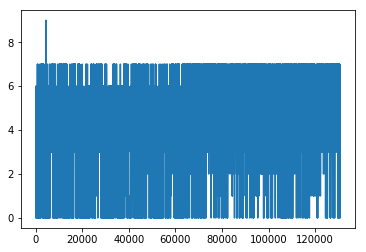

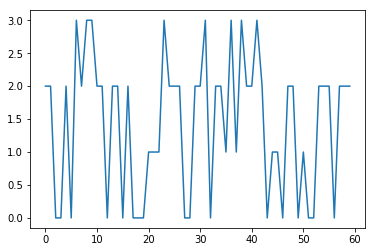

In [125]:
import matplotlib.pyplot as plt
plt.plot(DP[0])
plt.show()
plt.plot(cdata[14])
plt.show()

In [103]:
import pickle
l=DP[0]
with open("distanceprofile.txt", 'wb') as fp:
    pickle.dump(l, fp)
with open('distanceprofile.txt', 'rb') as fp:
    distanceprofile= pickle.load(fp)


In [110]:
ConcateData= []
data = cdata[0:]
for i in range(len(data)):
    ConcateData = np.concatenate([ConcateData, data[i]])

In [156]:
print(len(ML))

0


In [149]:
#fazer a lista de motifs
MotifList = []
Window= 20
SeriesSize = 60
for win in range(len(DP)):
    Distprofile = DP[win]
    for i in range(len(Distprofile)):
        if(Distprofile[i]<2):
            motif = ConcateData[i+((i-1)//(SeriesSize - Window +1))*(Window -1) : i+((i-1)//(SeriesSize - Window +1))*(Window -1) + Window]
            MotifList.append(motif)
            if(len(motif)==0):
                print(i)

#agrupar motifs
import pickle
l=MotifList
with open("distmotifs.txt", 'wb') as fp:
    pickle.dump(l, fp)
with open('distmotifs.txt', 'rb') as fp:
    ML= pickle.load(fp)
pare = 0

groups = []
while pare != 2 :
    subseq = ML[0]
    index = [0]
    for i in range(1, len(ML)):
        subseq2= ML[i]
        Distance = 0
        for k in range(Window):
            if(subseq[k] != subseq2[k]):
                Distance= Distance+1
        if(Distance< 4):
            index.append(i)
    group=[]
    for i in range(len(index), -1, -1):
        group.append(ML[i].copy())
        del(ML[i])
    groups.append(group)
    if(len(ML)< 2):
        pare = 2

l=groups
with open("groups.txt", 'wb') as fp:
    pickle.dump(l, fp)

In [146]:
i= 130790
print(i+((i-1)//(SeriesSize - Window +1))*(Window -1) , i+((i-1)//(SeriesSize - Window +1))*(Window -1) + Window)

191381 191401


In [151]:
ginfo=[]
for i in range(len(groups)):
    ginfo.append(len(groups[i]))

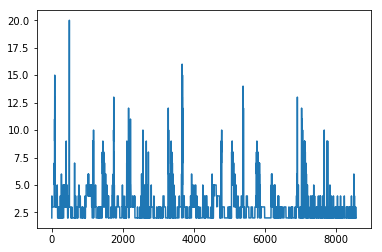

In [152]:

plt.plot(ginfo)
plt.show()

In [153]:
gruposquaisquer=[]
for i in range(len(groups)):
    if(len(groups[i])>4):
        gruposquaisquer.append(groups[i])

In [165]:
print(len(gruposquaisquer[0]))

6


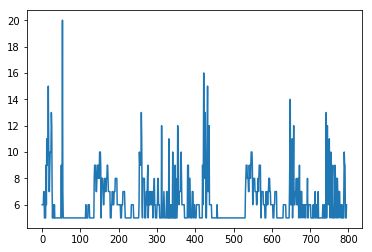

In [157]:
ginfo=[]
for i in range(len(gruposquaisquer)):
    ginfo.append(len(gruposquaisquer[i]))

plt.plot(ginfo)
plt.show()

In [166]:
representantes=[]
for i in range(len(gruposquaisquer)):
    representantes.append(gruposquaisquer[i][0])
l=representantes
with open("representantes.txt", 'wb') as fp:
    pickle.dump(l, fp)

In [203]:
#criar tabela atributo valor para AM, armazenar
TabelaAtributoValor= []
for i in range(len(data)):
    seq = data[i]
    repcount =[]
    for j in range(len(representantes)):
        sub = representantes[j]
        count= 0
        l=0
        while (l < len(seq)-Window+1):
            sub2= seq[l:l+Window]
            Distance=0
            for k in range(Window):
                if(sub[k] != sub2[k]):
                    Distance= Distance+1
            if(Distance< 10):
                count= count +1
                l= int(l +Window/2)
            else:
                l= l+1
        repcount.append(count)
    TabelaAtributoValor.append(repcount)
    
#feature selection, armazenar
#ensemble,AM


In [189]:
print(len(ctarg))

3190


In [198]:
l=TabelaAtributoValor
with open("TabelaAtributoValor.txt", 'wb') as fp:
    pickle.dump(l, fp)

In [5]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier


from sklearn.feature_selection import SelectFromModel

#ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [204]:
clf=[]
nome=[]
clf.append(tree.DecisionTreeClassifier())
nome.append('Decision Tree')
clf.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
nome.append('MLP classifier')
clf.append(SVC(gamma='auto'))
nome.append('SVC Support Vector Machines')
for i in range(len(clf)):
    scores = cross_val_score(clf[i], TabelaAtributoValor, ctarg, cv=10)
    y_pred = cross_val_predict(clf[i], TabelaAtributoValor, ctarg, cv=10)
    conf_mat = confusion_matrix(ctarg, y_pred)
    print(nome[i],'\nScores:',scores)
    print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
    print('Confusion:\n', conf_mat, '\n')

Decision Tree 
Scores: [0.578125   0.559375   0.55625    0.440625   0.584375   0.46708464
 0.6645768  0.5        0.5362776  0.56782334]
Accuracy: 0.55 (+/- 0.12) , ei: 0.40 , ie: 0.48, n: 0.64
Confusion:
 [[ 306  106  355]
 [  74  369  325]
 [ 312  292 1051]] 

MLP classifier 
Scores: [0.56875    0.534375   0.5875     0.5        0.56875    0.5015674
 0.5799373  0.58805031 0.5488959  0.61198738]
Accuracy: 0.56 (+/- 0.07) , ei: 0.59 , ie: 0.56, n: 0.54
Confusion:
 [[451  79 237]
 [ 76 431 261]
 [376 378 901]] 

SVC Support Vector Machines 
Scores: [0.665625   0.68125    0.6875     0.609375   0.66875    0.57680251
 0.69592476 0.6918239  0.6466877  0.77287066]
Accuracy: 0.67 (+/- 0.10) , ei: 0.45 , ie: 0.49, n: 0.85
Confusion:
 [[ 348   13  406]
 [  16  373  379]
 [ 108  132 1415]] 



In [10]:
clf=tree.DecisionTreeClassifier()
clf= clf.fit(TabelaAtributoValor,ctarg)
model = SelectFromModel(clf, prefit=True)
x = model.transform(TabelaAtributoValor)
print(len(TabelaAtributoValor[0]),len(x[0]))

796 277


In [193]:
print(len(TabelaAtributoValor[0]),len(x[0]))

796 226


In [206]:
clf=[]
nome=[]
clf.append(tree.DecisionTreeClassifier())
nome.append('Decision Tree')
clf.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
nome.append('MLP classifier')
clf.append(SVC(gamma='auto'))
nome.append('SVC Support Vector Machines')
for i in range(len(clf)):
    scores = cross_val_score(clf[i], x, ctarg, cv=10)
    y_pred = cross_val_predict(clf[i], x, ctarg, cv=10)
    conf_mat = confusion_matrix(ctarg, y_pred)
    print(nome[i],'\nScores:',scores)
    print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
    print('Confusion:\n', conf_mat, '\n')

Decision Tree 
Scores: [0.609375   0.534375   0.54375    0.5375     0.59375    0.50783699
 0.61442006 0.56918239 0.50788644 0.63091483]
Accuracy: 0.56 (+/- 0.09) , ei: 0.48 , ie: 0.49, n: 0.64
Confusion:
 [[ 368   86  313]
 [  85  378  305]
 [ 306  283 1066]] 

MLP classifier 
Scores: [0.58125    0.515625   0.6        0.540625   0.609375   0.48589342
 0.60815047 0.61320755 0.61198738 0.61198738]
Accuracy: 0.58 (+/- 0.09) , ei: 0.50 , ie: 0.64, n: 0.58
Confusion:
 [[385  94 288]
 [ 50 493 225]
 [302 388 965]] 

SVC Support Vector Machines 
Scores: [0.659375   0.675      0.68125    0.61875    0.65625    0.57366771
 0.72727273 0.68238994 0.6340694  0.75709779]
Accuracy: 0.67 (+/- 0.10) , ei: 0.48 , ie: 0.51, n: 0.82
Confusion:
 [[ 367   19  381]
 [  12  395  361]
 [ 137  154 1364]] 



In [4]:
import os
import pickle
os.chdir('C:\\Users\\Usuario\\Desktop\\dna')
with open('TabelaAtributoValor.txt', 'rb') as fp:
    TabelaAtributoValor= pickle.load(fp)
print(TabelaAtributoValor[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
clf=[]
nome=[]
cdata= TabelaAtributoValor
clf.append(tree.DecisionTreeClassifier())
nome.append('Decision Tree')
clf.append(SVC(gamma='auto'))
nome.append('SVC Support Vector Machines')
clf.append(KNeighborsClassifier(n_neighbors=1))
nome.append('Nearest Neighbors1')
clf.append(GaussianNB())
nome.append('GaussianNB')
clf.append(SGDClassifier(loss="hinge", penalty="l2", max_iter=5, tol= 1e-3))
nome.append('SGDclassifier - Stochastic Gradient Descent')
clf.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
nome.append('MLP classifier')
for i in range(len(clf)):
    scores = cross_val_score(clf[i], cdata, ctarg, cv=10)
    y_pred = cross_val_predict(clf[i], cdata, ctarg, cv=10)
    conf_mat = confusion_matrix(ctarg, y_pred)
    print(nome[i],'\nScores:',scores)
    print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
    print('Confusion:\n', conf_mat, '\n')
    
    
clf=[]
nome=[]
clf.append(tree.DecisionTreeClassifier())
nome.append('Decision Tree')
clf.append(SVC(gamma='auto'))
nome.append('SVC Support Vector Machines')
clf.append(KNeighborsClassifier(n_neighbors=1))
nome.append('Nearest Neighbors1')
clf.append(GaussianNB())
nome.append('GaussianNB')
clf.append(SGDClassifier(loss="hinge", penalty="l2", max_iter=5, tol= 1e-3))
nome.append('SGDclassifier - Stochastic Gradient Descent')
clf.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
nome.append('MLP classifier')
print('BAGGING')
for i in range(len(clf)):
    bclf = BaggingClassifier(clf[i], max_samples=0.5, max_features=0.5)
    scores = cross_val_score(bclf, cdata, ctarg, cv=10)
    y_pred = cross_val_predict(bclf, cdata, ctarg, cv=10)
    conf_mat = confusion_matrix(ctarg, y_pred)
    print(nome[i],'\nScores:',scores)
    print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
    print('Confusion:\n', conf_mat, '\n')


print('random Forest')
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

print('AdaBoost')
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

print('Gradient Tree Boosting')
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

print('Voting Classifier')
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf2 = AdaBoostClassifier(n_estimators=100)
clf3 = tree.DecisionTreeClassifier()
clf4 = GaussianNB()
clf5 = SVC(gamma='auto')
clf = VotingClassifier(estimators=[('gbc', clf1), ('ada', clf2), ('DTc', clf3), ('gNB', clf4), ('svc', clf5)], voting='hard')
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

Decision Tree 
Scores: [0.5625     0.546875   0.584375   0.50625    0.675      0.49529781
 0.65830721 0.53773585 0.5615142  0.6340694 ]
Accuracy: 0.58 (+/- 0.12) , ei: 0.45 , ie: 0.44, n: 0.68
Confusion:
 [[ 346   80  341]
 [  81  336  351]
 [ 276  254 1125]] 

SVC Support Vector Machines 
Scores: [0.58125    0.540625   0.51875    0.5375     0.5625     0.53291536
 0.57053292 0.54716981 0.52681388 0.62460568]
Accuracy: 0.55 (+/- 0.06) , ei: 0.08 , ie: 0.10, n: 0.99
Confusion:
 [[  60    1  706]
 [   0   74  694]
 [   4   17 1634]] 

Nearest Neighbors1 
Scores: [0.4625     0.415625   0.496875   0.409375   0.56875    0.40752351
 0.52351097 0.41194969 0.39747634 0.49842271]
Accuracy: 0.46 (+/- 0.11) , ei: 0.55 , ie: 0.34, n: 0.47
Confusion:
 [[421  67 279]
 [204 258 306]
 [678 191 786]] 

GaussianNB 
Scores: [0.51875    0.484375   0.5        0.478125   0.56875    0.38557994
 0.5862069  0.46540881 0.52050473 0.59621451]
Accuracy: 0.51 (+/- 0.12) , ei: 0.63 , ie: 0.63, n: 0.40
Confusion:
 [[

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

SGDclassifier - Stochastic Gradient Descent 
Scores: [0.59375    0.54375    0.609375   0.54375    0.584375   0.47962382
 0.65203762 0.5408805  0.52681388 0.64984227]
Accuracy: 0.57 (+/- 0.11) , ei: 0.46 , ie: 0.49, n: 0.62
Confusion:
 [[ 355   81  331]
 [  63  373  332]
 [ 299  327 1029]] 

MLP classifier 
Scores: [0.571875   0.53125    0.596875   0.5125     0.590625   0.50783699
 0.64576803 0.49056604 0.55520505 0.61198738]
Accuracy: 0.56 (+/- 0.10) , ei: 0.49 , ie: 0.43, n: 0.66
Confusion:
 [[ 373   70  324]
 [  81  333  354]
 [ 283  287 1085]] 

BAGGING
Decision Tree 
Scores: [0.61875    0.578125   0.59375    0.5625     0.675      0.55799373
 0.71159875 0.61320755 0.56782334 0.65930599]
Accuracy: 0.61 (+/- 0.10) , ei: 0.51 , ie: 0.51, n: 0.66
Confusion:
 [[ 389   67  311]
 [  54  394  320]
 [ 305  252 1098]] 

SVC Support Vector Machines 
Scores: [0.525      0.515625   0.51875    0.51875    0.528125   0.52037618
 0.52664577 0.51886792 0.52050473 0.51735016]
Accuracy: 0.52 (+/- 0.01)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

SGDclassifier - Stochastic Gradient Descent 
Scores: [0.603125   0.628125   0.60625    0.575      0.68125    0.51724138
 0.6645768  0.60062893 0.59621451 0.67507886]
Accuracy: 0.61 (+/- 0.09) , ei: 0.52 , ie: 0.47, n: 0.74
Confusion:
 [[ 397   30  340]
 [  43  360  365]
 [ 208  221 1226]] 

MLP classifier 
Scores: [0.6125     0.625      0.64375    0.58125    0.690625   0.51097179
 0.6677116  0.5754717  0.53943218 0.68138801]
Accuracy: 0.61 (+/- 0.11) , ei: 0.45 , ie: 0.49, n: 0.72
Confusion:
 [[ 343   42  382]
 [  53  380  335]
 [ 235  223 1197]] 

random Forest

Scores: [0.5875     0.590625   0.621875   0.55625    0.678125   0.53918495
 0.66144201 0.58490566 0.5362776  0.65299685]
Accuracy: 0.60 (+/- 0.10) , ei: 0.48 , ie: 0.50, n: 0.69
Confusion:
 [[ 370   62  335]
 [  53  385  330]
 [ 269  236 1150]] 

AdaBoost

Scores: [0.621875   0.625      0.609375   0.60625    0.6625     0.56739812
 0.65830721 0.62264151 0.5362776  0.66246057]
Accuracy: 0.62 (+/- 0.08) , ei: 0.46 , ie: 0.45, n: 

In [11]:
clf=[]
nome=[]
cdata= x
clf.append(tree.DecisionTreeClassifier())
nome.append('Decision Tree')
clf.append(SVC(gamma='auto'))
nome.append('SVC Support Vector Machines')
clf.append(KNeighborsClassifier(n_neighbors=1))
nome.append('Nearest Neighbors1')
clf.append(GaussianNB())
nome.append('GaussianNB')
clf.append(SGDClassifier(loss="hinge", penalty="l2", max_iter=5, tol= 1e-3))
nome.append('SGDclassifier - Stochastic Gradient Descent')
clf.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
nome.append('MLP classifier')
for i in range(len(clf)):
    scores = cross_val_score(clf[i], cdata, ctarg, cv=10)
    y_pred = cross_val_predict(clf[i], cdata, ctarg, cv=10)
    conf_mat = confusion_matrix(ctarg, y_pred)
    print(nome[i],'\nScores:',scores)
    print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
    print('Confusion:\n', conf_mat, '\n')
    
    
clf=[]
nome=[]
clf.append(tree.DecisionTreeClassifier())
nome.append('Decision Tree')
clf.append(SVC(gamma='auto'))
nome.append('SVC Support Vector Machines')
clf.append(KNeighborsClassifier(n_neighbors=1))
nome.append('Nearest Neighbors1')
clf.append(GaussianNB())
nome.append('GaussianNB')
clf.append(SGDClassifier(loss="hinge", penalty="l2", max_iter=5, tol= 1e-3))
nome.append('SGDclassifier - Stochastic Gradient Descent')
clf.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
nome.append('MLP classifier')
print('BAGGING')
for i in range(len(clf)):
    bclf = BaggingClassifier(clf[i], max_samples=0.5, max_features=0.5)
    scores = cross_val_score(bclf, cdata, ctarg, cv=10)
    y_pred = cross_val_predict(bclf, cdata, ctarg, cv=10)
    conf_mat = confusion_matrix(ctarg, y_pred)
    print(nome[i],'\nScores:',scores)
    print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
    print('Confusion:\n', conf_mat, '\n')


print('random Forest')
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

print('AdaBoost')
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

print('Gradient Tree Boosting')
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

print('Voting Classifier')
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf2 = AdaBoostClassifier(n_estimators=100)
clf3 = tree.DecisionTreeClassifier()
clf4 = GaussianNB()
clf5 = SVC(gamma='auto')
clf = VotingClassifier(estimators=[('gbc', clf1), ('ada', clf2), ('DTc', clf3), ('gNB', clf4), ('svc', clf5)], voting='hard')
scores = cross_val_score(clf, cdata, ctarg, cv=10)
y_pred = cross_val_predict(clf, cdata, ctarg, cv=10)
conf_mat = confusion_matrix(ctarg, y_pred)
print('\nScores:',scores)
print("Accuracy: %0.2f (+/- %0.2f) , ei: %0.2f , ie: %0.2f, n: %0.2f" % (scores.mean(), scores.std() * 2, conf_mat[0][0]/sum(conf_mat[0]), conf_mat[1][1]/sum(conf_mat[1]),conf_mat[2][2]/sum(conf_mat[2])))
print('Confusion:\n', conf_mat, '\n')

Decision Tree 
Scores: [0.6        0.5625     0.628125   0.575      0.634375   0.4984326
 0.65517241 0.58805031 0.57728707 0.59621451]
Accuracy: 0.59 (+/- 0.08) , ei: 0.48 , ie: 0.47, n: 0.69
Confusion:
 [[ 366   86  315]
 [  90  361  317]
 [ 272  246 1137]] 

SVC Support Vector Machines 
Scores: [0.625      0.58125    0.540625   0.5625     0.65625    0.54858934
 0.59874608 0.57232704 0.52681388 0.70662461]
Accuracy: 0.59 (+/- 0.11) , ei: 0.16 , ie: 0.22, n: 0.96
Confusion:
 [[ 126    3  638]
 [   2  169  597]
 [  21   41 1593]] 

Nearest Neighbors1 
Scores: [0.45       0.44375    0.4875     0.446875   0.534375   0.43573668
 0.51410658 0.43710692 0.38801262 0.50788644]
Accuracy: 0.46 (+/- 0.09) , ei: 0.59 , ie: 0.45, n: 0.41
Confusion:
 [[451  86 230]
 [185 347 236]
 [676 295 684]] 

GaussianNB 
Scores: [0.5875     0.534375   0.528125   0.50625    0.609375   0.44827586
 0.5862069  0.50943396 0.5488959  0.60567823]
Accuracy: 0.55 (+/- 0.10) , ei: 0.70 , ie: 0.64, n: 0.43
Confusion:
 [[5

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

SGDclassifier - Stochastic Gradient Descent 
Scores: [0.61875    0.63125    0.65       0.578125   0.625      0.55799373
 0.64890282 0.59119497 0.57413249 0.65930599]
Accuracy: 0.61 (+/- 0.07) , ei: 0.47 , ie: 0.46, n: 0.74
Confusion:
 [[ 360   49  358]
 [  60  354  354]
 [ 223  207 1225]] 

MLP classifier 
Scores: [0.61875    0.56875    0.584375   0.54375    0.590625   0.48589342
 0.66144201 0.5754717  0.55205047 0.59305994]
Accuracy: 0.58 (+/- 0.09) , ei: 0.49 , ie: 0.51, n: 0.65
Confusion:
 [[ 373   94  300]
 [  77  389  302]
 [ 297  278 1080]] 

BAGGING
Decision Tree 
Scores: [0.659375   0.653125   0.671875   0.5625     0.66875    0.55172414
 0.72727273 0.60062893 0.55520505 0.74132492]
Accuracy: 0.64 (+/- 0.13) , ei: 0.43 , ie: 0.45, n: 0.81
Confusion:
 [[ 330   50  387]
 [  39  345  384]
 [ 152  158 1345]] 

SVC Support Vector Machines 
Scores: [0.578125   0.5375     0.51875    0.55       0.55       0.52037618
 0.55172414 0.55031447 0.52050473 0.58990536]
Accuracy: 0.55 (+/- 0.05)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-

SGDclassifier - Stochastic Gradient Descent 
Scores: [0.653125   0.615625   0.590625   0.58125    0.7        0.54545455
 0.71159875 0.58805031 0.55205047 0.71293375]
Accuracy: 0.63 (+/- 0.12) , ei: 0.48 , ie: 0.51, n: 0.75
Confusion:
 [[ 371   44  352]
 [  45  388  335]
 [ 208  208 1239]] 

MLP classifier 
Scores: [0.65625    0.63125    0.621875   0.5875     0.678125   0.53605016
 0.73354232 0.59119497 0.55520505 0.73817035]
Accuracy: 0.63 (+/- 0.13) , ei: 0.43 , ie: 0.47, n: 0.82
Confusion:
 [[ 326   36  405]
 [  25  362  381]
 [ 141  165 1349]] 

random Forest

Scores: [0.60625    0.6        0.61875    0.5875     0.6625     0.53605016
 0.68338558 0.60691824 0.54258675 0.66876972]
Accuracy: 0.61 (+/- 0.09) , ei: 0.48 , ie: 0.52, n: 0.72
Confusion:
 [[ 368   60  339]
 [  50  399  319]
 [ 227  229 1199]] 

AdaBoost

Scores: [0.628125   0.634375   0.63125    0.61875    0.63125    0.54545455
 0.69592476 0.66666667 0.57413249 0.69400631]
Accuracy: 0.63 (+/- 0.09) , ei: 0.46 , ie: 0.47, n: 